## Gruppenprojekt Marketing Analytics

Eingereicht von Roya Abdel Nasser, Karar Ghawami, Alexandra Gohr & Natalie Schwientek

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import datetime as dt
from statsmodels.tsa.seasonal import STL

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})
pd.options.display.max_columns = 999

In [2]:
# Dateipfad einstellen
import os
os.chdir('C:\\Users\\natal\OneDrive\Dokumente\GitHub\Gruppenprojekt-Marketing-Analytics')

### 1. Data Preparation

In [3]:
dtypes_calendar_data = {
    'weekd_id' : 'int',
    'event_type_1' : 'category',
    'event_type_2' : 'category'
}

dtypes_prices_data = {
    'week_id' : 'int',
    'item_id' : 'category',
    'price' : 'float64'  
}

dtypes_sales_data = {
    'week_id' : 'int',
    'dept_id' : 'category',
    'cat_id' : 'category',
    'sales' : 'int',
    'item_id' : 'category'
}


calendar_data = pd.read_csv("calendar.csv",parse_dates = ['date'], dtype = dtypes_calendar_data)
prices_data = pd.read_csv("prices.csv", dtype = dtypes_prices_data)
#sales_data = pd.read_csv("sales.csv", parse_dates = ['date'], dtype = dtypes_sales_data)

zf = zipfile.ZipFile('ezyzip.zip') 
sales_data = pd.read_csv(zf.open('sales.csv'),parse_dates = ['date'], dtype = dtypes_sales_data)

display(calendar_data.head())
display(calendar_data.info())
display(prices_data.head())
display(prices_data.info())
display(sales_data.head())
display(sales_data.info())

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
0,2011-02-01,11101,NaN,NaN,NaN,NaN,1
1,2011-02-02,11101,NaN,NaN,NaN,NaN,1
2,2011-02-03,11101,NaN,NaN,NaN,NaN,1
3,2011-02-04,11101,NaN,NaN,NaN,NaN,1
4,2011-02-05,11102,NaN,NaN,NaN,NaN,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1886 non-null   datetime64[ns]
 1   week_id       1886 non-null   int64         
 2   event_name_1  154 non-null    object        
 3   event_type_1  154 non-null    category      
 4   event_name_2  4 non-null      object        
 5   event_type_2  4 non-null      category      
 6   snap          1886 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(2), object(2)
memory usage: 77.7+ KB


None

,Unnamed: 0,item_id,week_id,price
0,0,HOBBIES_1_001,11325,9.58
1,1,HOBBIES_1_001,11326,9.58
2,2,HOBBIES_1_001,11327,8.26
3,3,HOBBIES_1_001,11328,8.26
4,4,HOBBIES_1_001,11329,8.26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661824 entries, 0 to 661823
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Unnamed: 0  661824 non-null  int64   
 1   item_id     661824 non-null  category
 2   week_id     661824 non-null  int32   
 3   price       661824 non-null  float64 
dtypes: category(1), float64(1), int32(1), int64(1)
memory usage: 14.0 MB


None

,date,item_id,dept_id,cat_id,sales
0,2011-02-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-02-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-02-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-02-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-02-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652846 entries, 0 to 5652845
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   item_id  category      
 2   dept_id  category      
 3   cat_id   category      
 4   sales    int32         
dtypes: category(3), datetime64[ns](1), int32(1)
memory usage: 86.3 MB


None

In [4]:
merged_data = pd.merge(sales_data, calendar_data, on= "date")
merged_data.head()

,date,item_id,dept_id,cat_id,sales,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
0,2011-02-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1
1,2011-02-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1
2,2011-02-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1
3,2011-02-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1
4,2011-02-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1


In [5]:
full_data = pd.merge(merged_data, prices_data, on= ["week_id", "item_id"])

display(full_data.info())
display(full_data.head(100))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4528539 entries, 0 to 4528538
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   item_id       category      
 2   dept_id       category      
 3   cat_id        category      
 4   sales         int32         
 5   week_id       int64         
 6   event_name_1  object        
 7   event_type_1  category      
 8   event_name_2  object        
 9   event_type_2  category      
 10  snap          int64         
 11  Unnamed: 0    int64         
 12  price         float64       
dtypes: category(5), datetime64[ns](1), float64(1), int32(1), int64(3), object(2)
memory usage: 319.7+ MB


None

,date,item_id,dept_id,cat_id,sales,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,Unnamed: 0,price
0,2011-02-01,HOBBIES_1_008,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,1512,0.46
1,2011-02-02,HOBBIES_1_008,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,1512,0.46
2,2011-02-03,HOBBIES_1_008,HOBBIES_1,HOBBIES,4,11101,NaN,NaN,NaN,NaN,1,1512,0.46
3,2011-02-04,HOBBIES_1_008,HOBBIES_1,HOBBIES,6,11101,NaN,NaN,NaN,NaN,1,1512,0.46
4,2011-02-01,HOBBIES_1_009,HOBBIES_1,HOBBIES,3,11101,NaN,NaN,NaN,NaN,1,1794,1.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-02-04,HOBBIES_1_076,HOBBIES_1,HOBBIES,1,11101,NaN,NaN,NaN,NaN,1,17276,2.94
96,2011-02-01,HOBBIES_1_078,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,17781,11.97
97,2011-02-02,HOBBIES_1_078,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,17781,11.97
98,2011-02-03,HOBBIES_1_078,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,17781,11.97


In [6]:
full_data.set_index(['date'], inplace = True)
full_data.sort_index(axis = 0, ascending = True, inplace = True)
display(full_data.head(10))

,item_id,dept_id,cat_id,sales,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,Unnamed: 0,price
date,,,,,,,,,,,,
2011-02-01,HOBBIES_1_008,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,1512,0.46
2011-02-01,FOODS_2_207,FOODS_2,FOODS,0,11101,NaN,NaN,NaN,NaN,1,467458,6.84
2011-02-01,HOUSEHOLD_1_327,HOUSEHOLD_1,HOUSEHOLD,1,11101,NaN,NaN,NaN,NaN,1,200374,0.94
2011-02-01,FOODS_2_208,FOODS_2,FOODS,0,11101,NaN,NaN,NaN,NaN,1,467740,6.98
2011-02-01,FOODS_2_211,FOODS_2,FOODS,1,11101,NaN,NaN,NaN,NaN,1,468152,2.64
2011-02-01,HOUSEHOLD_1_325,HOUSEHOLD_1,HOUSEHOLD,0,11101,NaN,NaN,NaN,NaN,1,199811,3.32
2011-02-01,FOODS_2_212,FOODS_2,FOODS,4,11101,NaN,NaN,NaN,NaN,1,468434,4.18
2011-02-01,HOUSEHOLD_1_324,HOUSEHOLD_1,HOUSEHOLD,0,11101,NaN,NaN,NaN,NaN,1,199529,5.97
2011-02-01,FOODS_2_218,FOODS_2,FOODS,1,11101,NaN,NaN,NaN,NaN,1,469570,3.25


In [7]:
full_data_clean = full_data.drop("Unnamed: 0", axis=1)
full_data_clean.head()

,item_id,dept_id,cat_id,sales,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,price
date,,,,,,,,,,,
2011-02-01,HOBBIES_1_008,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,0.46
2011-02-01,FOODS_2_207,FOODS_2,FOODS,0,11101,NaN,NaN,NaN,NaN,1,6.84
2011-02-01,HOUSEHOLD_1_327,HOUSEHOLD_1,HOUSEHOLD,1,11101,NaN,NaN,NaN,NaN,1,0.94
2011-02-01,FOODS_2_208,FOODS_2,FOODS,0,11101,NaN,NaN,NaN,NaN,1,6.98
2011-02-01,FOODS_2_211,FOODS_2,FOODS,1,11101,NaN,NaN,NaN,NaN,1,2.64


Als zusätziche erklärende Variablen werden der jeweilige Name und Wochentag eingefügt. Um die einzelnen Variaben in die Modelle einfließen lassen zu können, werden diese binär kodiert und zu Dummy-Variablen transformiert

In [8]:
#data = pd.get_dummies(data, columns = ['Month'], drop_first = False)
#Week_id entfernen und wochentage neu codieren
#Umsatzspalte mit multiplikation von Sales un Price durchführen, dann erst aufaggregieren?
#aggregation nach datum vorher sinnvoll? 

full_data_clean['Month'] = full_data_clean.index.month_name()
full_data_clean['Weekday'] = full_data_clean.index.day_name()
data = pd.get_dummies(full_data_clean, columns = ['event_name_1','event_type_1','event_name_2','event_type_2', 'Month', 'Weekday'], drop_first = False)
data.head(20)

,item_id,dept_id,cat_id,sales,week_id,snap,price,event_name_1_Chanukah End,event_name_1_Christmas,event_name_1_Cinco De Mayo,event_name_1_ColumbusDay,event_name_1_Easter,event_name_1_Eid al-Fitr,event_name_1_EidAlAdha,event_name_1_Father's day,event_name_1_Halloween,event_name_1_IndependenceDay,event_name_1_LaborDay,event_name_1_LentStart,event_name_1_LentWeek2,event_name_1_MartinLutherKingDay,event_name_1_MemorialDay,event_name_1_Mother's day,event_name_1_NBAFinalsEnd,event_name_1_NBAFinalsStart,event_name_1_NewYear,event_name_1_OrthodoxChristmas,event_name_1_OrthodoxEaster,event_name_1_Pesach End,event_name_1_PresidentsDay,event_name_1_Purim End,event_name_1_Ramadan starts,event_name_1_StPatricksDay,event_name_1_SuperBowl,event_name_1_Thanksgiving,event_name_1_ValentinesDay,event_name_1_VeteransDay,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_type_2_Cultural,event_type_2_Religious,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-01,HOBBIES_1_008,HOBBIES_1,HOBBIES,0,11101,1,0.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2011-02-01,FOODS_2_207,FOODS_2,FOODS,0,11101,1,6.84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2011-02-01,HOUSEHOLD_1_327,HOUSEHOLD_1,HOUSEHOLD,1,11101,1,0.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2011-02-01,FOODS_2_208,FOODS_2,FOODS,0,11101,1,6.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2011-02-01,FOODS_2_211,FOODS_2,FOODS,1,11101,1,2.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2011-02-01,HOUSEHOLD_1_325,HOUSEHOLD_1,HOUSEHOLD,0,11101,1,3.32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2011-02-01,FOODS_2_212,FOODS_2,FOODS,4,11101,1,4.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2011-02-01,HOUSEHOLD_1_324,HOUSEHOLD_1,HOUSEHOLD,0,11101,1,5.97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2011-02-01,FOODS_2_218,FOODS_2,FOODS,1,11101,1,3.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [9]:
data.item_id.value_counts()

FOODS_1_001      1854
HOBBIES_1_063    1854
HOBBIES_1_086    1854
HOBBIES_1_084    1854
HOBBIES_1_082    1854
                 ... 
FOODS_2_248       128
FOODS_2_117        65
FOODS_2_209        65
FOODS_3_296        44
FOODS_3_595        16
Name: item_id, Length: 3049, dtype: int64

In [10]:
# Daten auf Tagesbasis aggregieren
data_grouped = data.groupby('date').apply(

        lambda data: pd.Series({
            'sales':                           data.sales.sum(),
            'snap': data.snap.max(),
            
       #    'dept_id_FOODS_1' : data.dept_id_FOODS_1.max(),
        #   'dept_id_FOODS_2' : data.dept_id_FOODS_2.max(),
         #  'dept_id_FOODS_3' : data.dept_id_FOODS_3.max(),

          # 'dept_id_HOBBIES_1' : data.dept_id_HOBBIES_1.max(),
           #'dept_id_HOBBIES_2' : data.dept_id_HOBBIES_2.max(),
          
           #'dept_id_HOUSEHOLD_1' : data.dept_id_HOUSEHOLD_1.max(),
           #'dept_id_HOUSEHOLD_2' : data.dept_id_HOUSEHOLD_2.max(),
            
            'mean_price_food':      data.loc[data.cat_id == 'FOODS', 'price'].mean(),            
            'mean_price_hobbies':   data.loc[data.cat_id == 'HOBBIES', 'price'].mean(),
            'mean_price_household': data.loc[data.cat_id == 'HOUSEHOLD', 'price'].mean(),

          
            'event_type_1_Cultural' : data.event_type_1_Cultural.max(), 
            'event_type_1_National': data.event_type_1_National.max(), 
            'event_type_1_Religious': data.event_type_1_Religious.max(), 
            'event_type_1_Sporting': data.event_type_1_Sporting.max(), 
            'event_type_2_Cultural' : data.event_type_2_Cultural.max(), 
            'event_type_2_Religious': data.event_type_2_Religious.max(), 
            
            'Month_April': data.Month_April.max(),
            'Month_August': data.Month_August.max(),
            'Month_December': data.Month_December.max(),
            'Month_February': data.Month_February.max(),
            'Month_January': data.Month_January.max(),
            'Month_July': data.Month_July.max(),
            'Month_June': data.Month_June.max(),
            'Month_March': data.Month_March.max(),
            'Month_May': data.Month_May.max(),
            'Month_November': data.Month_November.max(),
            'Month_October': data.Month_October.max(),
            'Month_September': data.Month_September.max(),
            
            'Weekday_Friday':   data.Weekday_Friday.max(),
            'Weekday_Monday':   data.Weekday_Monday.max(),
            'Weekday_Saturday': data.Weekday_Saturday.max(),
            'Weekday_Sunday':   data.Weekday_Sunday.max(),
            'Weekday_Thursday': data.Weekday_Thursday.max(),
            'Weekday_Tuesday':  data.Weekday_Tuesday.max(),
            'Weekday_Wednesday':data.Weekday_Wednesday.max()
                               
       }))
data_grouped.head(20)

# cat ID: überlegen, ob Aggregation mit .sum() oder .max () sinnvoll. Bei sum - Anzahl der (einzelnen) Items pro Kategorie pro Tag
# max: Ja/Nein, ob innerhalb dieser Kategorie gekauft wurde -- ist aber jeden Tag der Fall gibt daher keinen Aufschluss auf Sales. Ebenso bei Dept ID

,sales,snap,mean_price_food,mean_price_hobbies,mean_price_household,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-01,3051.0,1.0,3.149220,4.468814,5.416099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-02-02,2630.0,1.0,3.149220,4.468814,5.416099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2011-02-03,3276.0,1.0,3.149220,4.468814,5.416099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2011-02-04,3450.0,1.0,3.149220,4.468814,5.416099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-05,5437.0,1.0,3.153394,4.406516,5.509579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2011-02-06,4340.0,1.0,3.153394,4.406516,5.509579,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2011-02-07,3157.0,1.0,3.153394,4.406516,5.509579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2011-02-08,2995.0,1.0,3.153394,4.406516,5.509579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-02-09,2710.0,1.0,3.153394,4.406516,5.509579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
data_grouped.mean_price_food.value_counts()

3.245413    5
3.264314    4
3.254275    3
3.296626    3
3.125868    3
           ..
3.306943    1
3.260847    1
3.277098    1
3.342077    1
3.296976    1
Name: mean_price_food, Length: 1573, dtype: int64

<AxesSubplot:xlabel='date', ylabel='mean_price_food'>

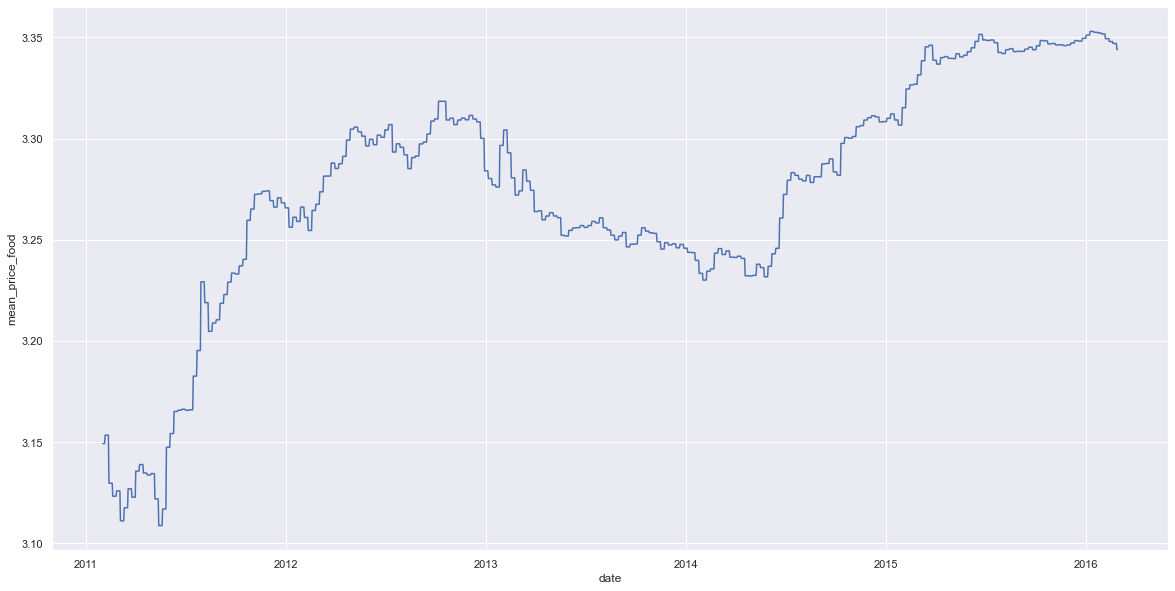

In [12]:
# Darstellung der Preisentwicklung in der Kategorie Food
sns.lineplot(x = 'date', y = 'mean_price_food', data = data_grouped, estimator = 'mean')

<AxesSubplot:xlabel='date', ylabel='mean_price_hobbies'>

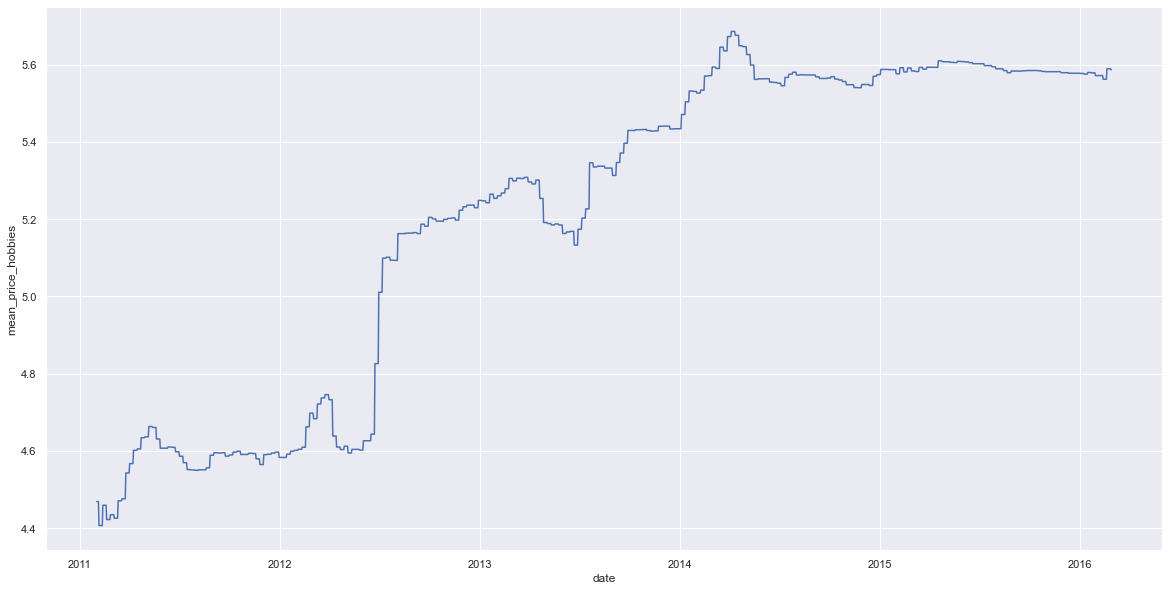

In [13]:
# Darstellung der Preisentwicklung in der Kategorie Hobbies
sns.lineplot(x = 'date', y = 'mean_price_hobbies', data = data_grouped, estimator = 'mean')

<AxesSubplot:xlabel='date', ylabel='mean_price_household'>

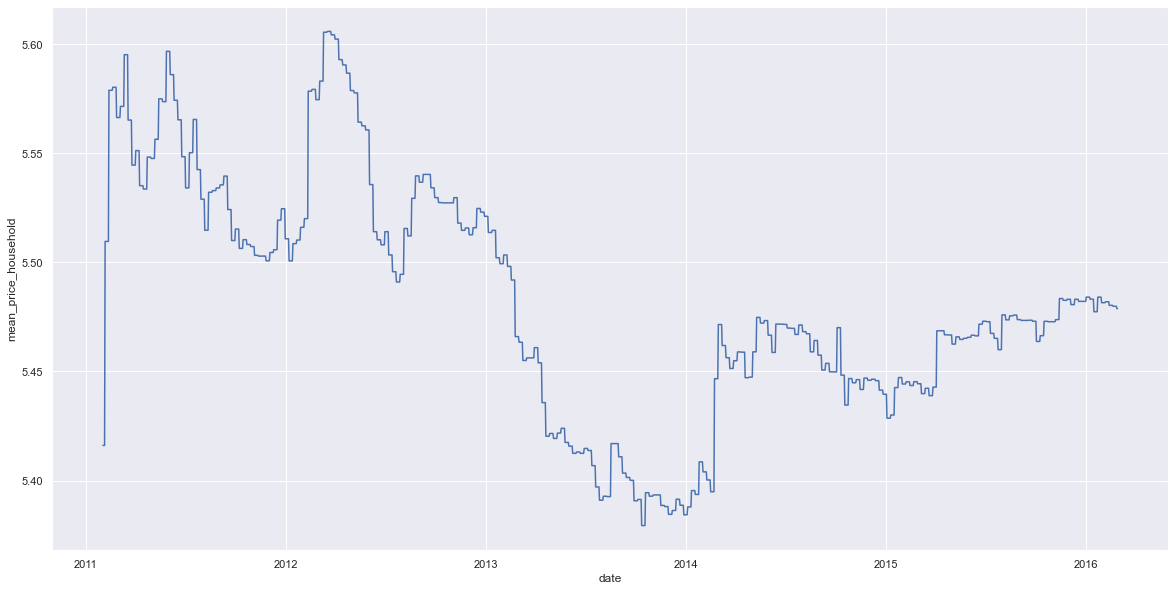

In [14]:
# Darstellung der Preisentwicklung in der Kategorie Household
sns.lineplot(x = 'date', y = 'mean_price_household', data = data_grouped, estimator = 'mean')

Die Preisverlaufsdiagramme zeigen, dass die Preisentwicklung in den verschiedenen Kategorien sehr unterschiedlich verläuft. Da wir vermuten, dass die Preise einen hohen Einfluss auf den Absatz haben, wird der ursprüngliche Datensatz für die nächsten Schritte in drei einzelne Datensätze unterteilt, um die Prognose detaillierter pro Kategorie abzubilden

In [15]:
#Aggregation pro Kategorie
data_food = data.loc[data['cat_id'] == 'FOODS']
data_household = data.loc[data['cat_id'] == 'HOUSEHOLD']
data_hobbies = data.loc[data['cat_id'] == 'HOBBIES']

In [16]:
food_grouped = data_food.groupby('date').apply(

        lambda data_food: pd.Series({
            'sales':                           data_food.sales.sum(),
            'snap': data_food.snap.max(),
            
       #    'dept_id_FOODS_1' : data.dept_id_FOODS_1.max(),
        #   'dept_id_FOODS_2' : data.dept_id_FOODS_2.max(),
         #  'dept_id_FOODS_3' : data.dept_id_FOODS_3.max(),

          # 'dept_id_HOBBIES_1' : data.dept_id_HOBBIES_1.max(),
           #'dept_id_HOBBIES_2' : data.dept_id_HOBBIES_2.max(),
          
           #'dept_id_HOUSEHOLD_1' : data.dept_id_HOUSEHOLD_1.max(),
           #'dept_id_HOUSEHOLD_2' : data.dept_id_HOUSEHOLD_2.max(),
            
            'mean_price_dept1':   data_food.loc[data_food.dept_id == 'FOODS_1', 'price'].mean(),            
            'mean_price_dept2':   data_food.loc[data_food.dept_id == 'FOODS_2', 'price'].mean(),
            'mean_price_dept3':   data_food.loc[data_food.dept_id == 'FOODS_3', 'price'].mean(),

          
            'event_type_1_Cultural' : data_food.event_type_1_Cultural.max(), 
            'event_type_1_National': data_food.event_type_1_National.max(), 
            'event_type_1_Religious': data_food.event_type_1_Religious.max(), 
            'event_type_1_Sporting': data_food.event_type_1_Sporting.max(), 
            'event_type_2_Cultural' : data_food.event_type_2_Cultural.max(), 
            'event_type_2_Religious': data_food.event_type_2_Religious.max(), 
            
            'Month_April': data_food.Month_April.max(),
            'Month_August': data_food.Month_August.max(),
            'Month_December': data_food.Month_December.max(),
            'Month_February': data_food.Month_February.max(),
            'Month_January': data_food.Month_January.max(),
            'Month_July': data_food.Month_July.max(),
            'Month_June': data_food.Month_June.max(),
            'Month_March': data_food.Month_March.max(),
            'Month_May': data_food.Month_May.max(),
            'Month_November': data_food.Month_November.max(),
            'Month_October': data_food.Month_October.max(),
            'Month_September': data_food.Month_September.max(),
            
            'Weekday_Friday':   data_food.Weekday_Friday.max(),
            'Weekday_Monday':   data_food.Weekday_Monday.max(),
            'Weekday_Saturday': data_food.Weekday_Saturday.max(),
            'Weekday_Sunday':   data_food.Weekday_Sunday.max(),
            'Weekday_Thursday': data_food.Weekday_Thursday.max(),
            'Weekday_Tuesday':  data_food.Weekday_Tuesday.max(),
            'Weekday_Wednesday':data_food.Weekday_Wednesday.max()
                               
       }))
food_grouped.head(20)

,sales,snap,mean_price_dept1,mean_price_dept2,mean_price_dept3,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-01,2258.0,1.0,2.989109,3.807460,2.828994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-02-02,2032.0,1.0,2.989109,3.807460,2.828994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2011-02-03,2407.0,1.0,2.989109,3.807460,2.828994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2011-02-04,2693.0,1.0,2.989109,3.807460,2.828994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-05,3962.0,1.0,3.016636,3.875838,2.797716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2011-02-06,3418.0,1.0,3.016636,3.875838,2.797716,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2011-02-07,2446.0,1.0,3.016636,3.875838,2.797716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2011-02-08,2138.0,1.0,3.016636,3.875838,2.797716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-02-09,2001.0,1.0,3.016636,3.875838,2.797716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
hobbies_grouped = data_hobbies.groupby('date').apply(

        lambda data_hobbies: pd.Series({
            'sales':                           data_hobbies.sales.sum(),
           # 'snap': data.snap.max(),
            
       #    'dept_id_FOODS_1' : data.dept_id_FOODS_1.max(),
        #   'dept_id_FOODS_2' : data.dept_id_FOODS_2.max(),
         #  'dept_id_FOODS_3' : data.dept_id_FOODS_3.max(),

          # 'dept_id_HOBBIES_1' : data.dept_id_HOBBIES_1.max(),
           #'dept_id_HOBBIES_2' : data.dept_id_HOBBIES_2.max(),
          
           #'dept_id_HOUSEHOLD_1' : data.dept_id_HOUSEHOLD_1.max(),
           #'dept_id_HOUSEHOLD_2' : data.dept_id_HOUSEHOLD_2.max(),
            
            'mean_price_dept1':   data_hobbies.loc[data_hobbies.dept_id == 'HOBBIES_1', 'price'].mean(),            
            'mean_price_dept2':   data_hobbies.loc[data_hobbies.dept_id == 'HOBBIES_2', 'price'].mean(),

          
            'event_type_1_Cultural' : data_hobbies.event_type_1_Cultural.max(), 
            'event_type_1_National': data_hobbies.event_type_1_National.max(), 
            'event_type_1_Religious': data_hobbies.event_type_1_Religious.max(), 
            'event_type_1_Sporting': data_hobbies.event_type_1_Sporting.max(), 
            'event_type_2_Cultural' : data_hobbies.event_type_2_Cultural.max(), 
            'event_type_2_Religious': data_hobbies.event_type_2_Religious.max(), 
            
            'Month_April': data_hobbies.Month_April.max(),
            'Month_August': data_hobbies.Month_August.max(),
            'Month_December': data_hobbies.Month_December.max(),
            'Month_February': data_hobbies.Month_February.max(),
            'Month_January': data_hobbies.Month_January.max(),
            'Month_July': data_hobbies.Month_July.max(),
            'Month_June': data_hobbies.Month_June.max(),
            'Month_March': data_hobbies.Month_March.max(),
            'Month_May': data_hobbies.Month_May.max(),
            'Month_November': data_hobbies.Month_November.max(),
            'Month_October': data_hobbies.Month_October.max(),
            'Month_September': data_hobbies.Month_September.max(),
            
             
            'Weekday_Friday':   data_hobbies.Weekday_Friday.max(),
            'Weekday_Monday':   data_hobbies.Weekday_Monday.max(),
            'Weekday_Saturday': data_hobbies.Weekday_Saturday.max(),
            'Weekday_Sunday':   data_hobbies.Weekday_Sunday.max(),
            'Weekday_Thursday': data_hobbies.Weekday_Thursday.max(),
            'Weekday_Tuesday':  data_hobbies.Weekday_Tuesday.max(),
            'Weekday_Wednesday':data_hobbies.Weekday_Wednesday.max()
                               
       }))
hobbies_grouped.head(20)

,sales,mean_price_dept1,mean_price_dept2,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-01,392.0,4.773416,2.982727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-02-02,268.0,4.773416,2.982727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2011-02-03,467.0,4.773416,2.982727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2011-02-04,346.0,4.773416,2.982727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-05,769.0,4.847572,2.816875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2011-02-06,432.0,4.847572,2.816875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2011-02-07,384.0,4.847572,2.816875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2011-02-08,496.0,4.847572,2.816875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-02-09,399.0,4.847572,2.816875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
household_grouped = data_household.groupby('date').apply(

        lambda data_household: pd.Series({
            'sales':                           data_household.sales.sum(),
         #   'snap': data.snap.max(),
            
       #    'dept_id_FOODS_1' : data.dept_id_FOODS_1.max(),
        #   'dept_id_FOODS_2' : data.dept_id_FOODS_2.max(),
         #  'dept_id_FOODS_3' : data.dept_id_FOODS_3.max(),

          # 'dept_id_HOBBIES_1' : data.dept_id_HOBBIES_1.max(),
           #'dept_id_HOBBIES_2' : data.dept_id_HOBBIES_2.max(),
          
           #'dept_id_HOUSEHOLD_1' : data.dept_id_HOUSEHOLD_1.max(),
           #'dept_id_HOUSEHOLD_2' : data.dept_id_HOUSEHOLD_2.max(),
            
            'mean_price_dept1':   data_household.loc[data_household.dept_id == 'HOUSEHOLD_1', 'price'].mean(),            
            'mean_price_dept2':   data_household.loc[data_household.dept_id == 'HOUSEHOLD_2', 'price'].mean(),
                     
            'event_type_1_Cultural' : data_household.event_type_1_Cultural.max(), 
            'event_type_1_National': data_household.event_type_1_National.max(), 
            'event_type_1_Religious': data_household.event_type_1_Religious.max(), 
            'event_type_1_Sporting': data_household.event_type_1_Sporting.max(), 
            'event_type_2_Cultural' : data_household.event_type_2_Cultural.max(), 
            'event_type_2_Religious': data_household.event_type_2_Religious.max(), 
            
            'Month_April': data_household.Month_April.max(),
            'Month_August': data_household.Month_August.max(),
            'Month_December': data_household.Month_December.max(),
            'Month_February': data_household.Month_February.max(),
            'Month_January': data_household.Month_January.max(),
            'Month_July': data_household.Month_July.max(),
            'Month_June': data_household.Month_June.max(),
            'Month_March': data_household.Month_March.max(),
            'Month_May': data_household.Month_May.max(),
            'Month_November': data_household.Month_November.max(),
            'Month_October': data_household.Month_October.max(),
            'Month_September': data_household.Month_September.max(),
            
             'Weekday_Friday':   data_household.Weekday_Friday.max(),
            'Weekday_Monday':   data_household.Weekday_Monday.max(),
            'Weekday_Saturday': data_household.Weekday_Saturday.max(),
            'Weekday_Sunday':   data_household.Weekday_Sunday.max(),
            'Weekday_Thursday': data_household.Weekday_Thursday.max(),
            'Weekday_Tuesday':  data_household.Weekday_Tuesday.max(),
            'Weekday_Wednesday':data_household.Weekday_Wednesday.max()
                               
       }))
household_grouped.head(20)

,sales,mean_price_dept1,mean_price_dept2,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-01,401.0,4.909198,5.789364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-02-02,330.0,4.909198,5.789364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2011-02-03,402.0,4.909198,5.789364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2011-02-04,411.0,4.909198,5.789364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-05,706.0,4.872775,5.941608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2011-02-06,490.0,4.872775,5.941608,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2011-02-07,327.0,4.872775,5.941608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2011-02-08,361.0,4.872775,5.941608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-02-09,310.0,4.872775,5.941608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 2. Deskriptive Statistiken des Datensatzes

In [19]:
## hier die Preisentwickungsdiagramme hin?
# Korrelationsplos? Boxplots?
# Linienplot/Autokorrelation des Absatzes? (weiter unten)

In [30]:
# Tagesabsatz (=sales) aggregieren für die Visualisierung
data_agg = data.resample('D').sum()
data_agg = data_agg[['sales']]
print(data_agg)

            sales
date             
2011-02-01   3051
2011-02-02   2630
2011-02-03   3276
2011-02-04   3450
2011-02-05   5437
...           ...
2016-02-24   3369
2016-02-25   3396
2016-02-26   4087
2016-02-27   5329
2016-02-28   6198

[1854 rows x 1 columns]


<AxesSubplot:xlabel='date', ylabel='sales'>

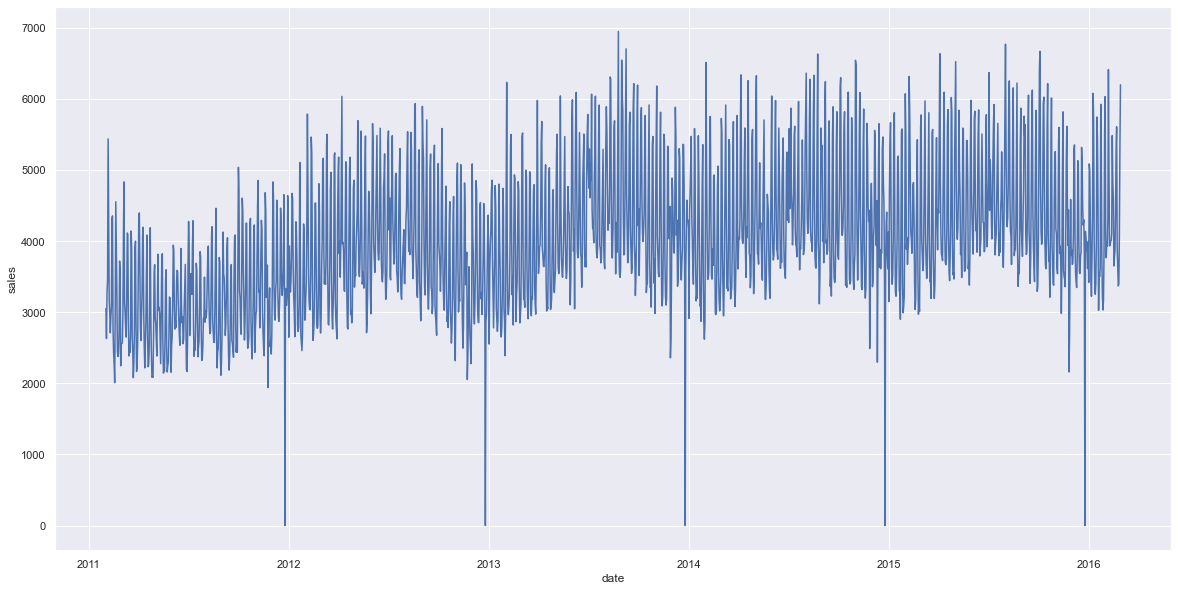

In [31]:
# Sales im Zeitverlauf
sns.lineplot(x = 'date', y = 'sales', data = data_agg, estimator = 'mean')

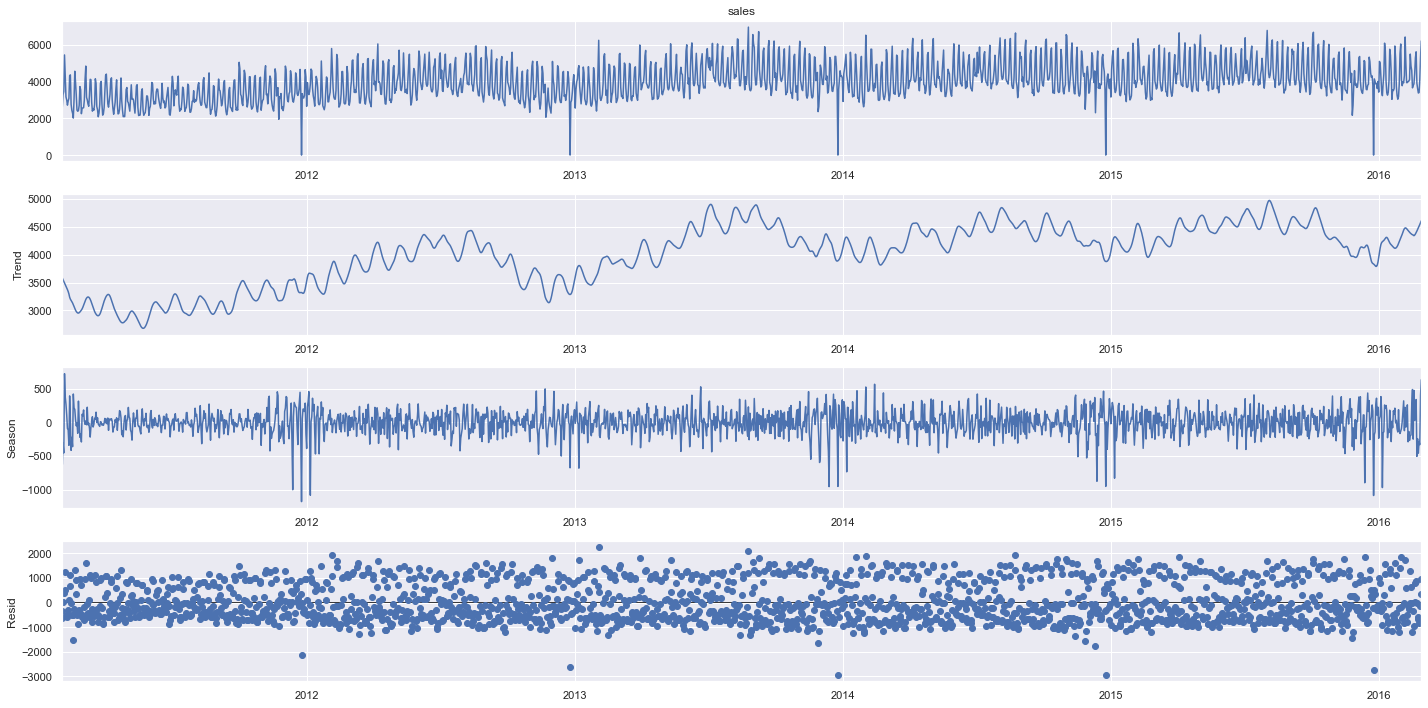

In [32]:
decompose = STL(data_agg['sales'], period=12).fit()
decompose.plot()
plt.show()

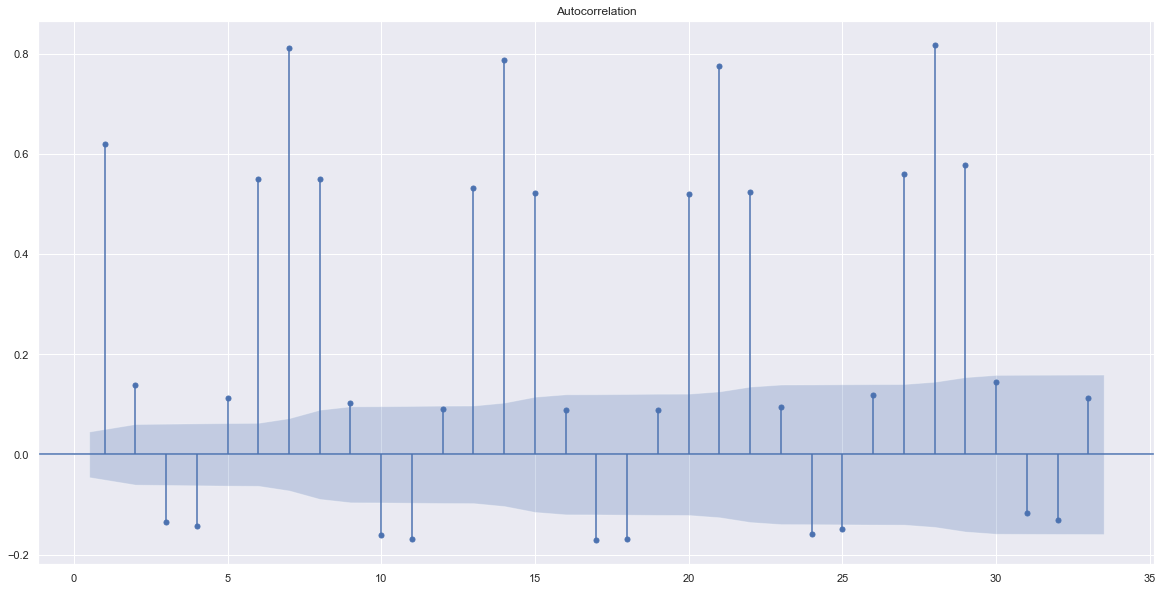

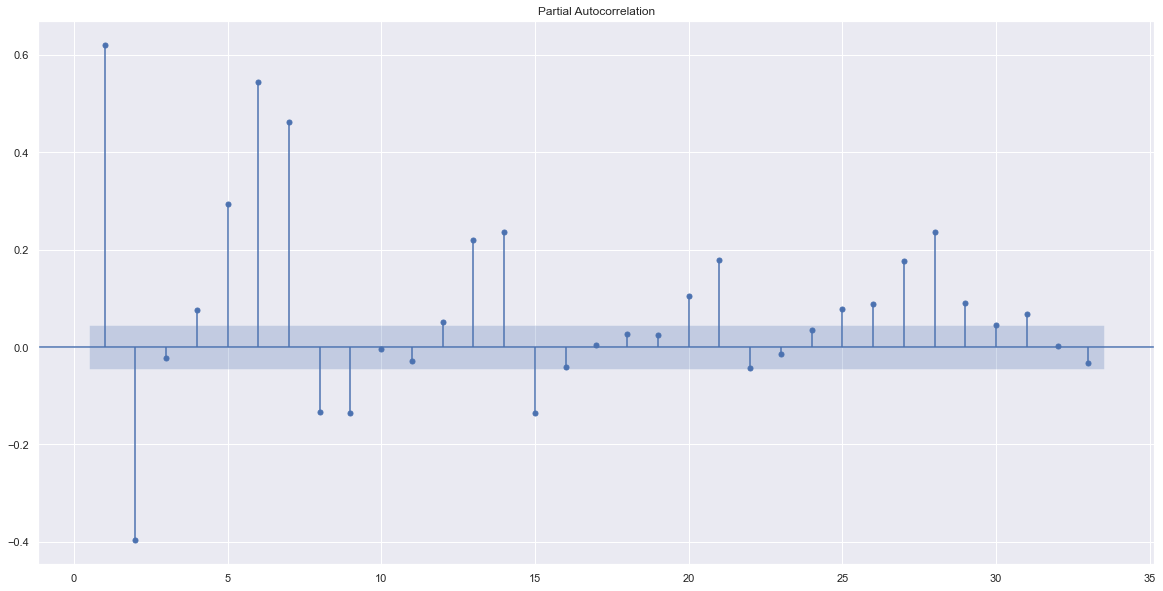

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_agg['sales'], zero = False)
plt.show()
plot_pacf(data_agg['sales'], zero = False)
plt.show()

## 3. Modelling

### 3.1 Feature importance

In [20]:
## Feature Importance je Zeitreihe ##

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error as MAE

In [21]:
# Food
# Variablen in zwei Datensätze splitten -> x = Erklärende Variablen; y = Sales
x_food = food_grouped.drop(columns = ['sales'])
y_food = food_grouped[['sales']]
k = np.floor(len(food_grouped)/28).astype(int)
cv = KFold(n_splits = k)
forecast = RandomForestRegressor(max_depth = 7)
scores = pd.DataFrame(cross_validate
                      (
                          forecast,
                          x_food,
                          y_food.values.ravel(),
                          scoring = 'neg_mean_absolute_error',
                          cv = cv,
                          verbose =1)
                     )

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 260.36
MAE mad:	 66.95


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   15.5s finished


In [22]:
forecast.fit(x_food, y_food.values.ravel())
importance = pd.DataFrame(data = forecast.feature_importances_, index = x_food.columns)
importance.columns = ['Importance']
display(importance.sort_values(by='Importance', ascending = False))
display(x_food.shape)

,Importance
Weekday_Saturday,0.281969
Weekday_Sunday,0.263751
mean_price_dept2,0.206896
snap,0.058326
Weekday_Friday,0.041693
event_type_1_National,0.032054
Weekday_Monday,0.031015
mean_price_dept3,0.022839
mean_price_dept1,0.021620
Month_July,0.006569


(1854, 29)

In [23]:
# Automatisierte Merkmalsauswahl
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

k = np.floor(len(food_grouped)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

selector = RFECV(
    forecast,
    step = 1,
    cv = cv,
    scoring = 'neg_mean_absolute_error'
)

selector = selector.fit(x_food, y_food.values.ravel())

selection = pd.DataFrame(data = selector.support_, index = x_food.columns)
selection.columns = ['Selected']
selection.index.name = 'Variable'
display(selection)

scores = pd.DataFrame(
    cross_validate(
        forecast,
        selector.transform(x_food),
        y_food.values.ravel(),
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

,Selected
Variable,
snap,True
mean_price_dept1,True
mean_price_dept2,True
mean_price_dept3,True
event_type_1_Cultural,True
event_type_1_National,True
event_type_1_Religious,True
event_type_1_Sporting,True
event_type_2_Cultural,False


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 259.86
MAE mad:	 66.57


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   17.6s finished


In [24]:
# Hobbies
# Variablen in zwei Datensätze splitten -> x = Erklärende Variablen; y = Sales
x_hobbies = hobbies_grouped.drop(columns = ['sales'])
y_hobbies = hobbies_grouped[['sales']]

k = np.floor(len(hobbies_grouped)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

scores = pd.DataFrame(cross_validate
                      (
                          forecast,
                          x_hobbies,
                          y_hobbies.values.ravel(),
                          scoring = 'neg_mean_absolute_error',
                          cv = cv,
                          verbose =1)
                     )

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 69.81
MAE mad:	 15.87


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   13.4s finished


In [25]:
forecast.fit(x_hobbies, y_hobbies.values.ravel())
importance = pd.DataFrame(data = forecast.feature_importances_, index = x_hobbies.columns)
importance.columns = ['Importance']
display(importance.sort_values(by='Importance', ascending = False))
display(x_hobbies.shape)

,Importance
mean_price_dept1,0.438529
Weekday_Saturday,0.210303
mean_price_dept2,0.112353
Weekday_Sunday,0.079284
Weekday_Friday,0.037448
event_type_1_National,0.032510
Month_December,0.021703
Month_February,0.009746
Weekday_Monday,0.007323
Month_June,0.006025


(1854, 27)

In [26]:
# Automatisierte Merkmalsauswahl
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

k = np.floor(len(hobbies_grouped)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

selector = RFECV(
    forecast,
    step = 1,
    cv = cv,
    scoring = 'neg_mean_absolute_error'
)

selector = selector.fit(x_hobbies, y_hobbies.values.ravel())

selection = pd.DataFrame(data = selector.support_, index = x_hobbies.columns)
selection.columns = ['Selected']
selection.index.name = 'Variable'
display(selection)

scores = pd.DataFrame(
    cross_validate(
        forecast,
        selector.transform(x_hobbies),
        y_hobbies.values.ravel(),
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

,Selected
Variable,
mean_price_dept1,True
mean_price_dept2,True
event_type_1_Cultural,True
event_type_1_National,True
event_type_1_Religious,False
event_type_1_Sporting,False
event_type_2_Cultural,False
event_type_2_Religious,False
Month_April,True


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 69.71
MAE mad:	 15.73


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   12.3s finished


In [27]:
# Household
# Variablen in zwei Datensätze splitten -> x = Erklärende Variablen; y = Sales
x_household = household_grouped.drop(columns = ['sales'])
y_household = household_grouped[['sales']]

k = np.floor(len(household_grouped)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

scores = pd.DataFrame(cross_validate
                      (
                          forecast,
                          x_household,
                          y_household.values.ravel(),
                          scoring = 'neg_mean_absolute_error',
                          cv = cv,
                          verbose =1)
                     )

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 83.61
MAE mad:	 24.46


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   13.0s finished


In [28]:
forecast.fit(x_household, y_household.values.ravel())
importance = pd.DataFrame(data = forecast.feature_importances_, index = x_household.columns)
importance.columns = ['Importance']
display(importance.sort_values(by='Importance', ascending = False))
display(x_household.shape)

,Importance
mean_price_dept2,0.423577
Weekday_Sunday,0.193692
Weekday_Saturday,0.185413
mean_price_dept1,0.114012
Weekday_Friday,0.019041
Weekday_Monday,0.018952
event_type_1_National,0.015772
event_type_1_Cultural,0.006375
Month_December,0.004778
Month_July,0.004256


(1854, 27)

In [29]:
# Automatisierte Merkmalsauswahl
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

k = np.floor(len(household_grouped)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

selector = RFECV(
    forecast,
    step = 1,
    cv = cv,
    scoring = 'neg_mean_absolute_error'
)

selector = selector.fit(x_household, y_household.values.ravel())

selection = pd.DataFrame(data = selector.support_, index = x_household.columns)
selection.columns = ['Selected']
selection.index.name = 'Variable'
display(selection)

scores = pd.DataFrame(
    cross_validate(
        forecast,
        selector.transform(x_household),
        y_household.values.ravel(),
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

,Selected
Variable,
mean_price_dept1,True
mean_price_dept2,True
event_type_1_Cultural,True
event_type_1_National,True
event_type_1_Religious,False
event_type_1_Sporting,False
event_type_2_Cultural,False
event_type_2_Religious,False
Month_April,False


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 83.49
MAE mad:	 24.28


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   12.0s finished


### 3.2 Einfache Verfahren

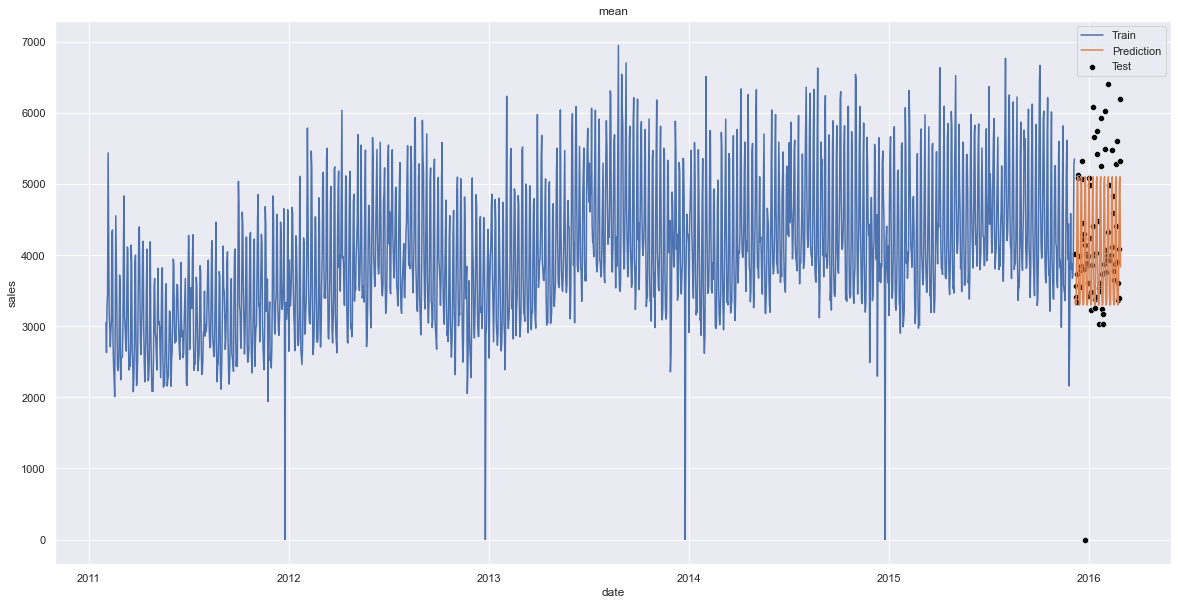

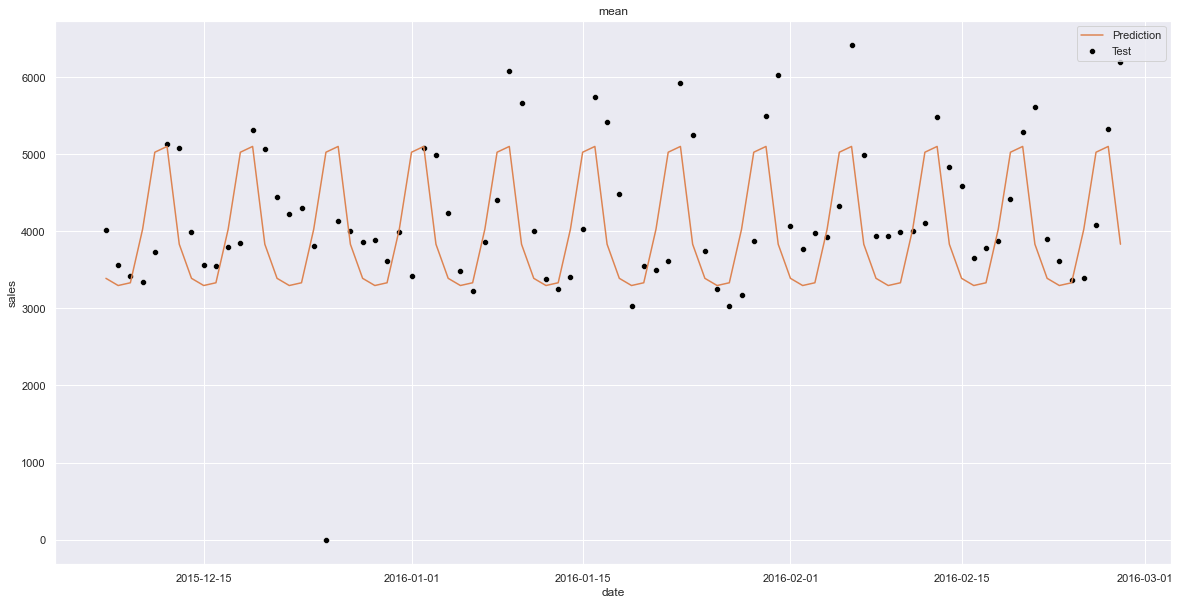

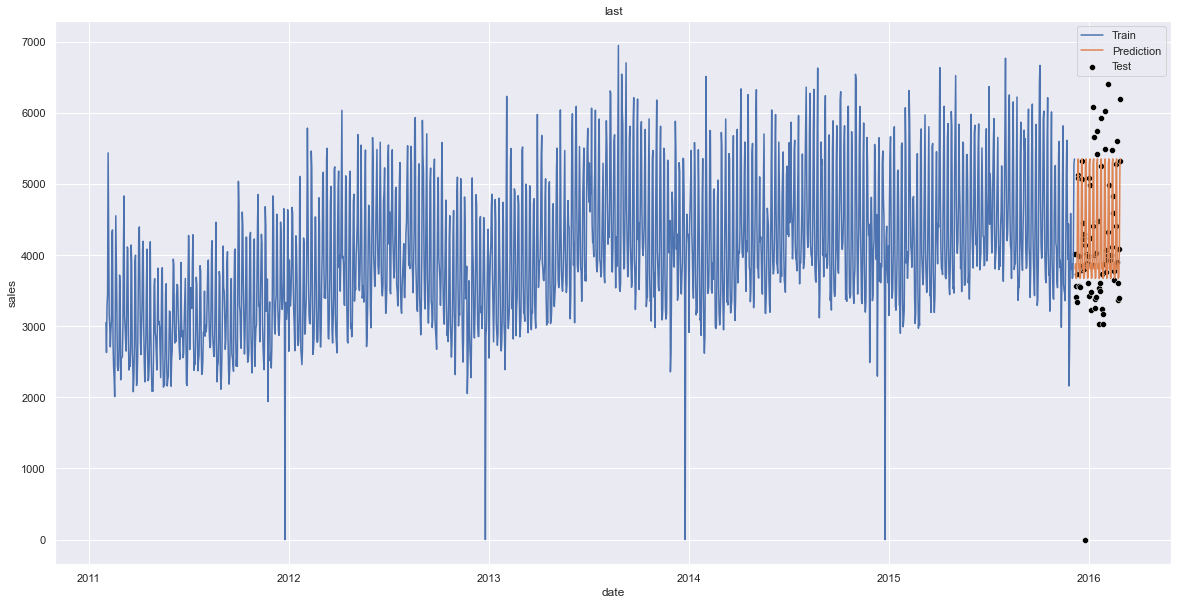

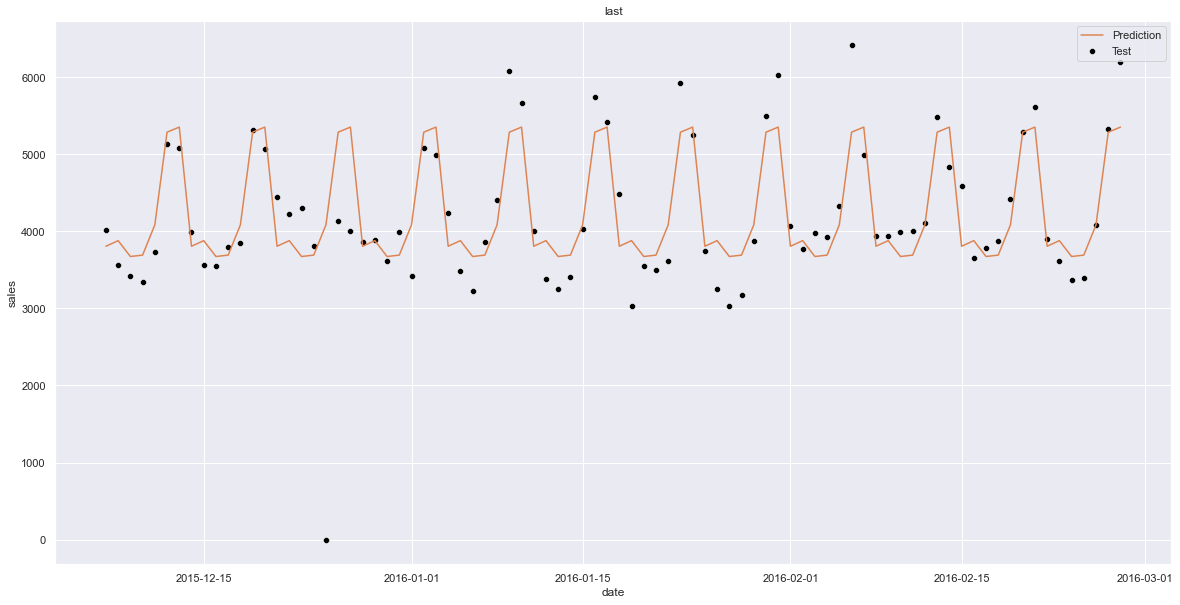

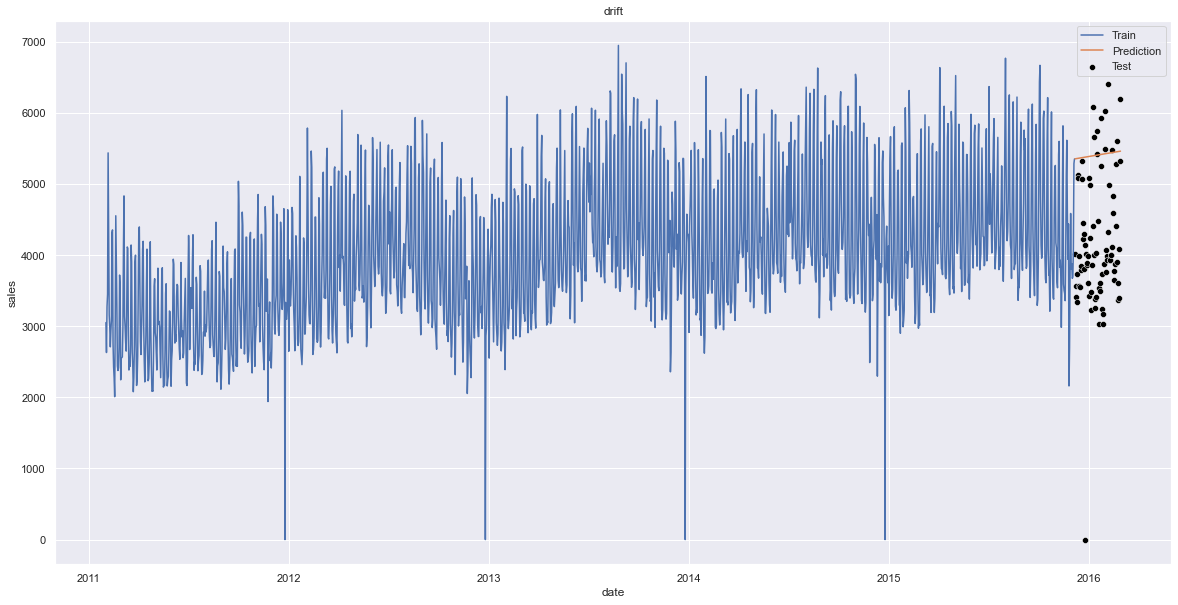

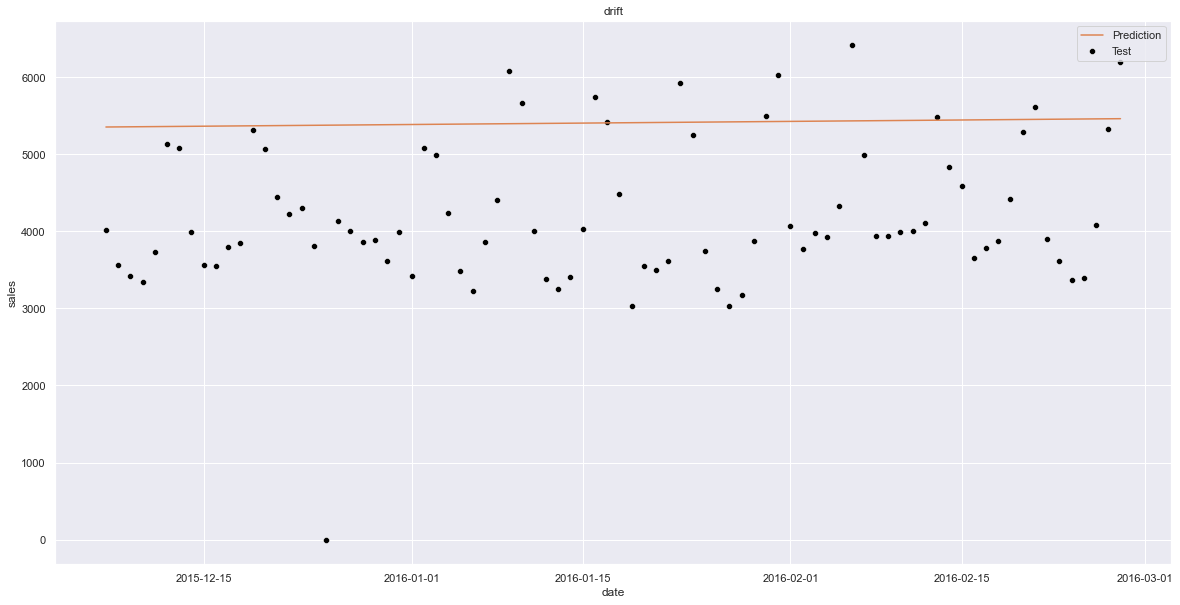

In [34]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

train, test = temporal_train_test_split(data_grouped, test_size = 3*28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

for strategy in ['mean', 'last', 'drift']:
    if strategy == 'drift':
        forecast = NaiveForecaster(strategy = strategy)
    else:
        forecast = NaiveForecaster(strategy = strategy, sp = 7)
    forecast.fit(train['sales'])
    
    sns.lineplot(data = train['sales'], label = 'Train')
    sns.scatterplot(data = test['sales'], color = 'black', label = 'Test')
    sns.lineplot(data = forecast.predict(fh), label = 'Prediction')
    plt.title(strategy)
    plt.show()
    
    sns.scatterplot(data = test['sales'], color = 'black', label = 'Test')
    sns.lineplot(data = forecast.predict(fh), color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
    plt.title(strategy)
    plt.show()

### 3.3 Lineare Regression

In [35]:
import sktime
from sklearn.linear_model import LinearRegression
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split


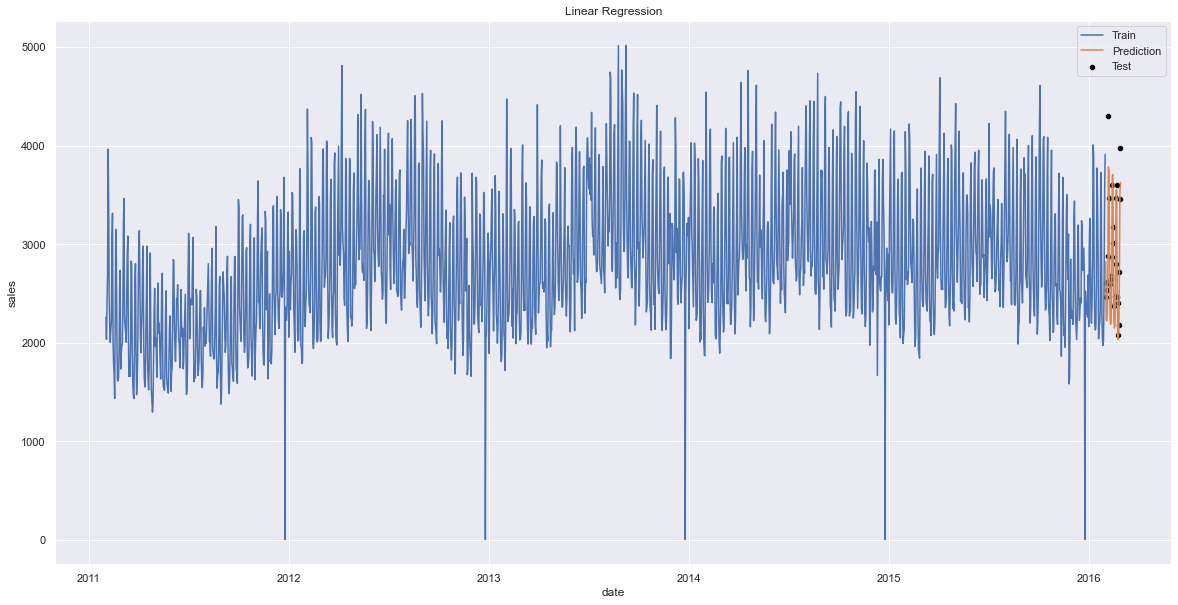

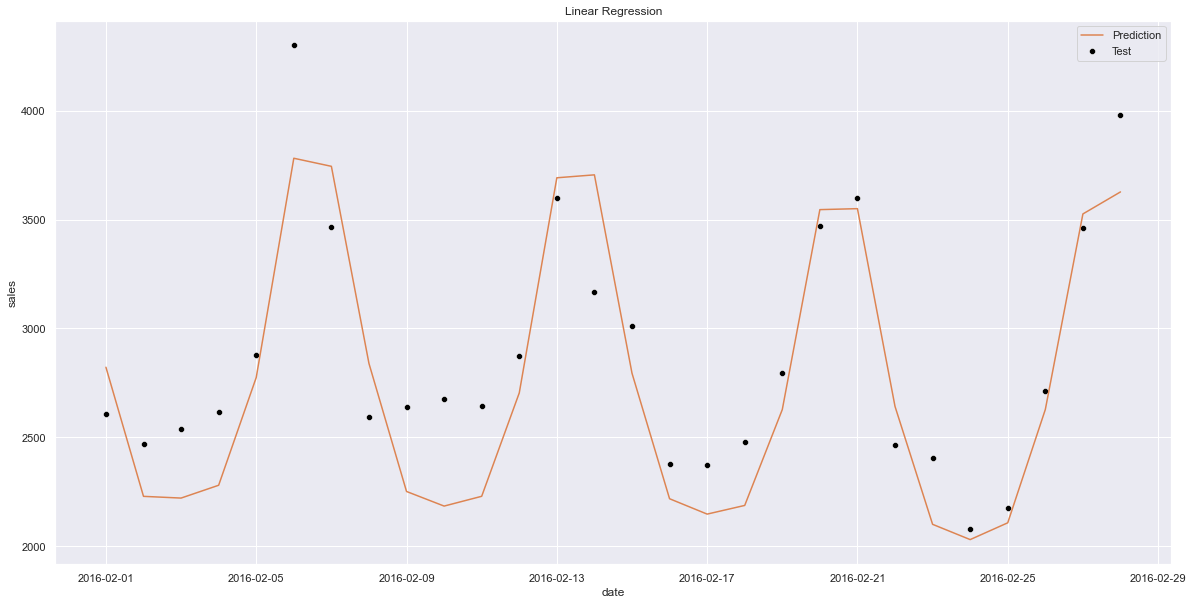

In [36]:
#Modellierung Food

train, test = temporal_train_test_split(food_grouped, test_size = 28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

reg = LinearRegression()
forecast = make_reduction(reg, window_length = 28, strategy = "recursive")

forecast.fit(train['sales'])
   
sns.lineplot(data = train['sales'], label = 'Train')
sns.scatterplot(data = test['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast.predict(fh), label = 'Prediction')
plt.title('Linear Regression')
plt.show()

sns.scatterplot(data = test['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast.predict(fh), color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

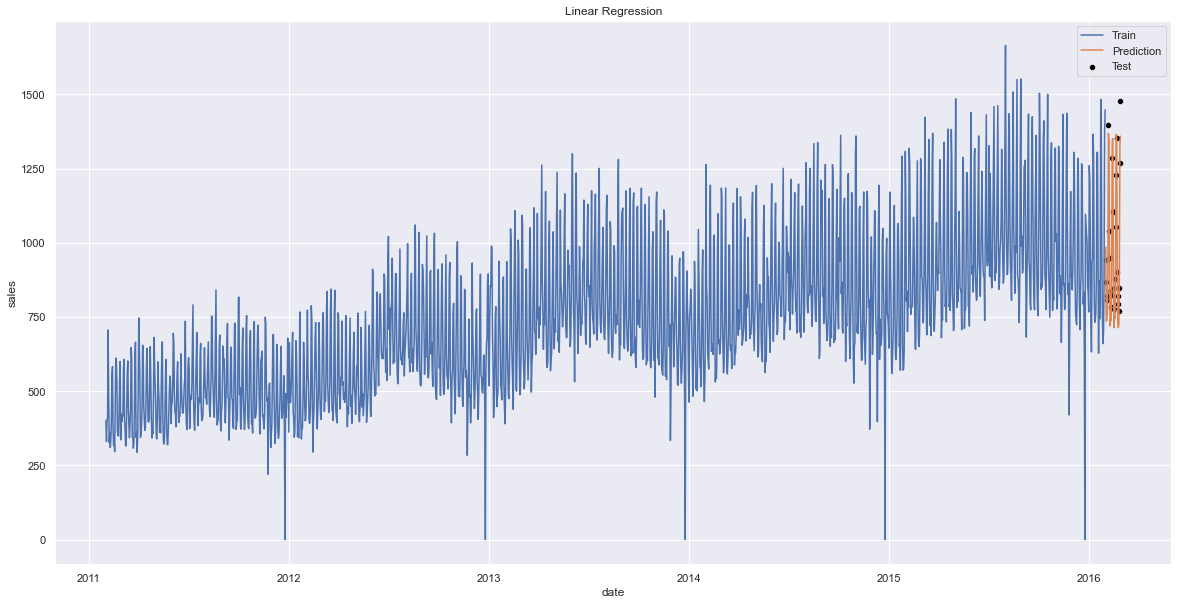

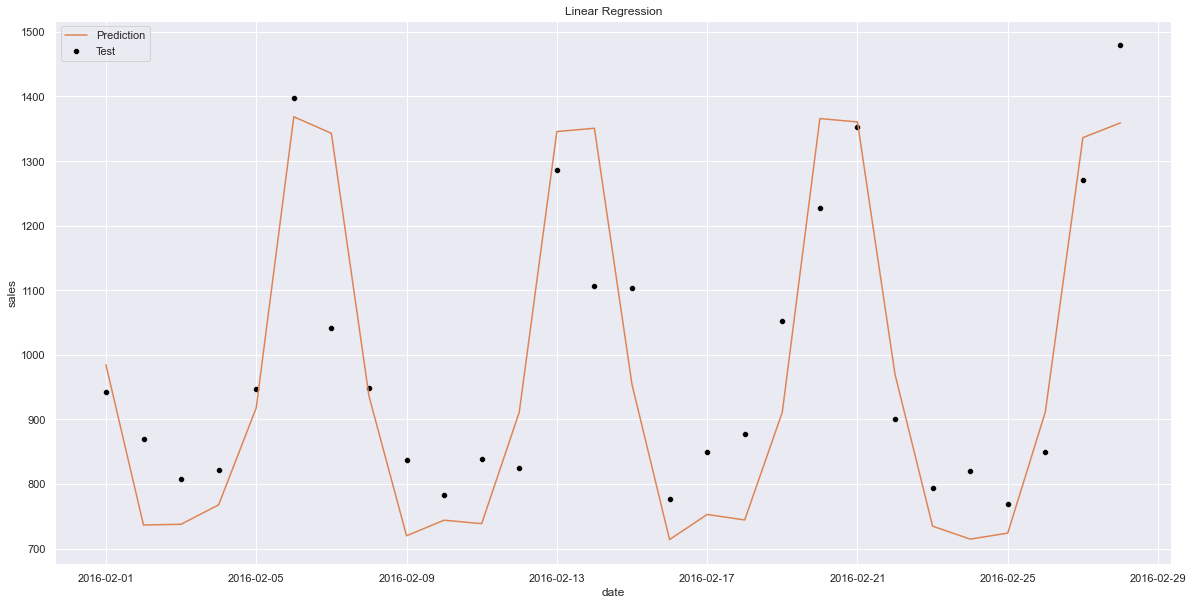

In [37]:
#Modellierung Household

train, test = temporal_train_test_split(household_grouped, test_size = 28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

reg = LinearRegression()
forecast = make_reduction(reg, window_length = 28, strategy = "recursive")

forecast.fit(train['sales'])
   
sns.lineplot(data = train['sales'], label = 'Train')
sns.scatterplot(data = test['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast.predict(fh), label = 'Prediction')
plt.title('Linear Regression')
plt.show()

sns.scatterplot(data = test['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast.predict(fh), color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

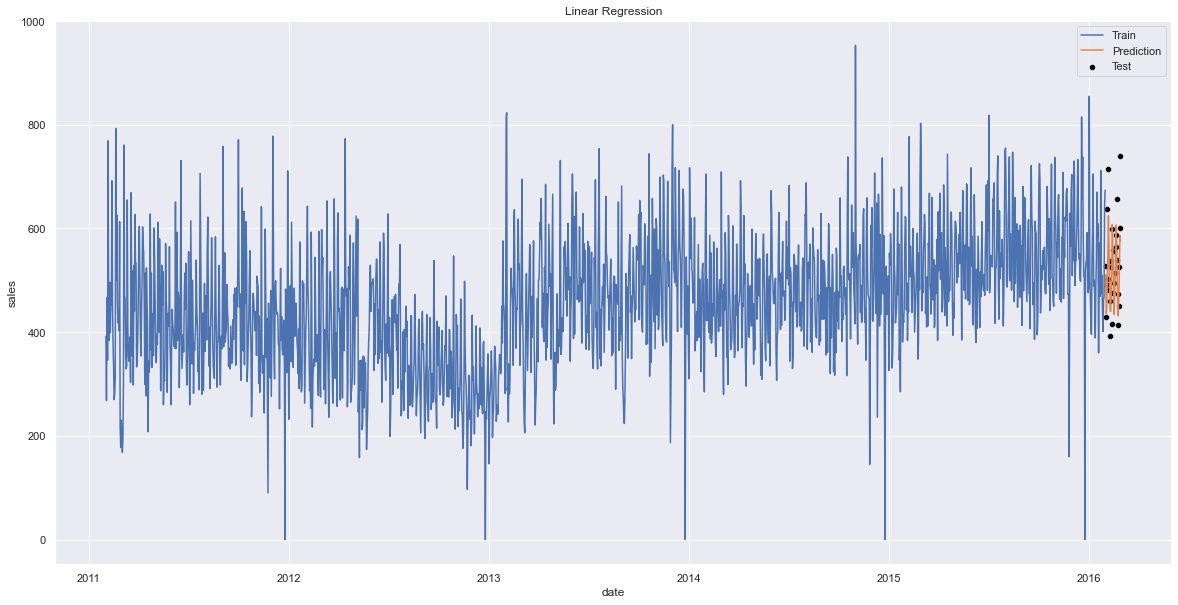

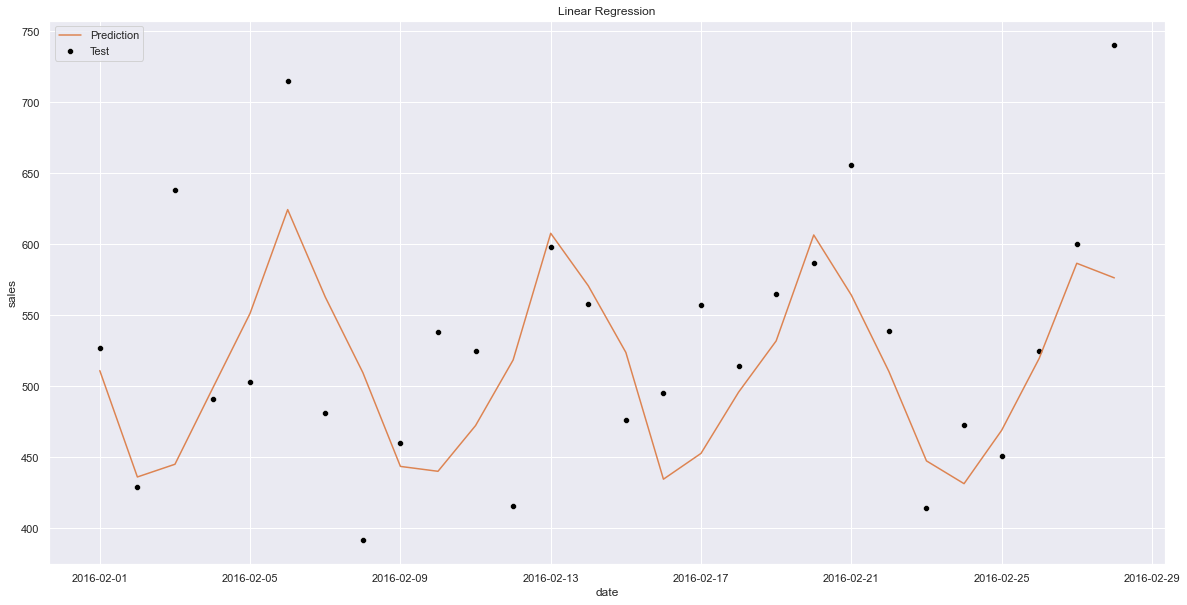

In [38]:
#Modellierung Hobbies

train, test = temporal_train_test_split(hobbies_grouped, test_size = 28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

reg = LinearRegression()
forecast = make_reduction(reg, window_length = 28, strategy = "recursive")

forecast.fit(train['sales'])
   
sns.lineplot(data = train['sales'], label = 'Train')
sns.scatterplot(data = test['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast.predict(fh), label = 'Prediction')
plt.title('Linear Regression')
plt.show()

sns.scatterplot(data = test['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast.predict(fh), color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

## auf den ersten Blick wirkt die Vorhersage von Hobbies weniger genau

### 3.4 Prophet

In [39]:
### Modell 2: Prophet (Natalie)

#!pip install prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.metrics import mean_absolute_error as MAE

In [43]:
# Event Data Frame bauen ("Holidays") für alle Zeitreihen

# Lower Window = Effekt vor Event
# Upper Window = Effekt nach Event

#cult_event_1 = pd.DataFrame(data_grouped[data_grouped.event_type_1_Cultural != 'None']['event_type_1_Cultural'])
cult_event_1 = pd.DataFrame(data_grouped[data_grouped.event_type_1_Cultural == True]['event_type_1_Cultural'])
cult_event_1.reset_index(inplace = True)
cult_event_1.columns = ['ds', 'holiday']
cult_event_1['holiday'] = 'cultural_event_1'
cult_event_1['lower_window'] = 0
cult_event_1['upper_window'] = 0
#display(cult_event_1)

cult_event_2 = pd.DataFrame(data_grouped[data_grouped.event_type_2_Cultural == True]['event_type_2_Cultural'])
cult_event_2.reset_index(inplace = True)
cult_event_2.columns = ['ds', 'holiday']
cult_event_2['holiday'] = 'cultural_event_2'
cult_event_2['lower_window'] = 0
cult_event_2['upper_window'] = 0
#display(cult_event_2)

sport_event_1 = pd.DataFrame(data_grouped[data_grouped.event_type_1_Sporting == True]['event_type_1_Sporting'])
sport_event_1.reset_index(inplace = True)
sport_event_1.columns = ['ds', 'holiday']
sport_event_1['holiday'] = 'sport_event_1'
sport_event_1['lower_window'] = 0
sport_event_1['upper_window'] = 0
#display(sport_event_1)

relig_event_1 = pd.DataFrame(data_grouped[data_grouped.event_type_1_Religious == True]['event_type_1_Religious'])
relig_event_1.reset_index(inplace = True)
relig_event_1.columns = ['ds', 'holiday']
relig_event_1['holiday'] = 'relig_event_1'
relig_event_1['lower_window'] = 0
relig_event_1['upper_window'] = 0
#display(relig_event_1)

relig_event_2 = pd.DataFrame(data_grouped[data_grouped.event_type_2_Religious == True]['event_type_2_Religious'])
relig_event_2.reset_index(inplace = True)
relig_event_2.columns = ['ds', 'holiday']
relig_event_2['holiday'] = 'relig_event_2'
relig_event_2['lower_window'] = 0
relig_event_2['upper_window'] = 0
#display(relig_event_2)

national_event_1 = pd.DataFrame(data_grouped[data_grouped.event_type_1_National == True]['event_type_1_National'])
national_event_1.reset_index(inplace = True)
national_event_1.columns = ['ds', 'holiday']
national_event_1['holiday'] = 'national_event_1'
national_event_1['lower_window'] = 0
national_event_1['upper_window'] = 0
#display(national_event_1)

holidays = pd.concat((cult_event_1, cult_event_2, sport_event_1, relig_event_1, relig_event_2, national_event_1))
holidays.sort_values(by='ds', inplace=True, ignore_index=True)
display(holidays)
# Ggf. lower / upper windows separat einstellen

,ds,holiday,lower_window,upper_window
0,2011-02-06,sport_event_1,0,0
1,2011-02-14,cultural_event_1,0,0
2,2011-02-21,national_event_1,0,0
3,2011-03-09,relig_event_1,0,0
4,2011-03-16,relig_event_1,0,0
...,...,...,...,...
150,2016-02-07,sport_event_1,0,0
151,2016-02-10,relig_event_1,0,0
152,2016-02-14,cultural_event_1,0,0
153,2016-02-15,national_event_1,0,0


,ds,y
0,2011-02-01,2258.0
1,2011-02-02,2032.0
2,2011-02-03,2407.0
3,2011-02-04,2693.0
4,2011-02-05,3962.0
...,...,...
1849,2016-02-24,2076.0
1850,2016-02-25,2176.0
1851,2016-02-26,2713.0
1852,2016-02-27,3459.0


<ipython-input-48-9fa25cebecbf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_food['mean_price_dept2'] = train_food['mean_price_dept2'].astype('float').to_numpy()
<ipython-input-48-9fa25cebecbf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_food['snap'] = train_food['snap'].astype('int').to_numpy()
<ipython-input-48-9fa25cebecbf>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

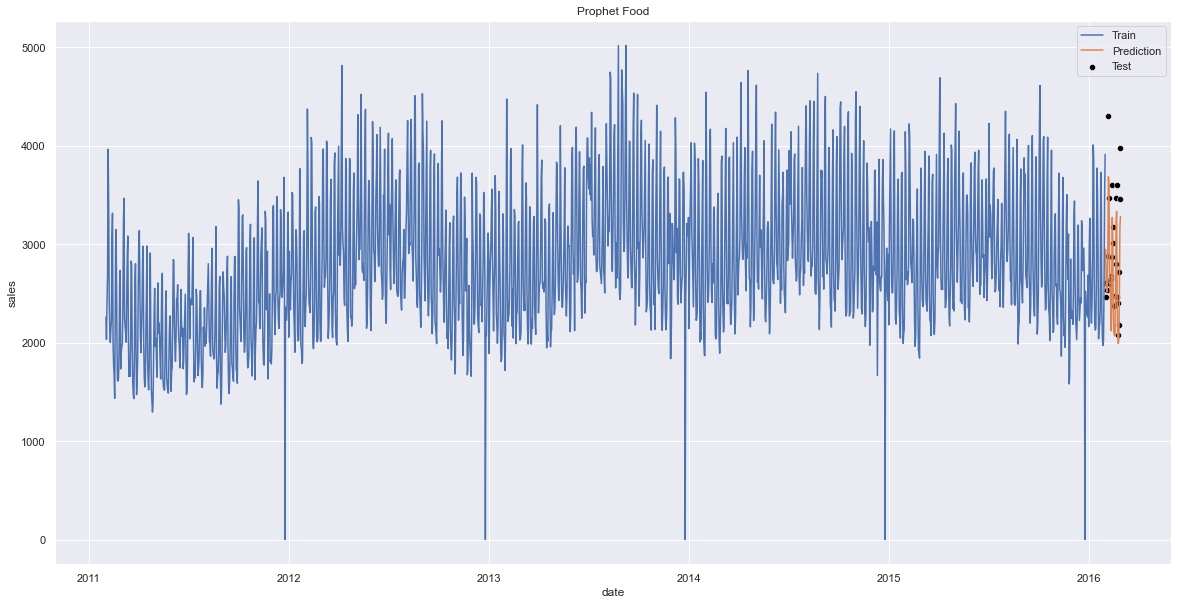

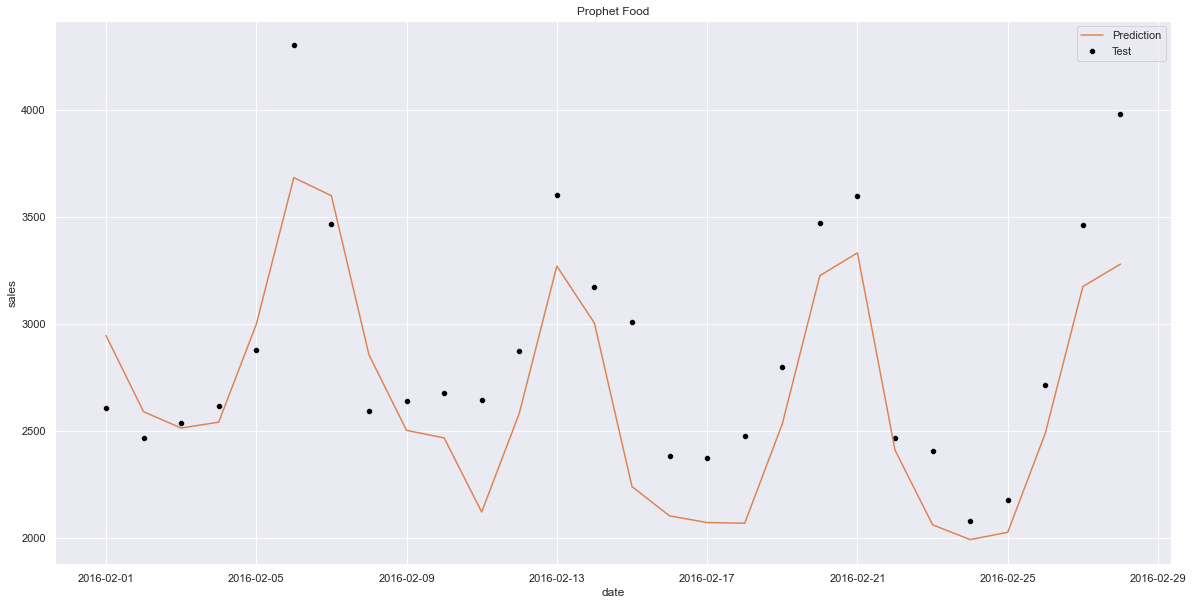

MAE:	 276.35


In [48]:
# Modellierung Food

# Food-Datensatz splitten
train_food, test_food = temporal_train_test_split(food_grouped, test_size = 28)

# Prophet Data Frame kreiren
df_prophet_food = pd.DataFrame(food_grouped['sales'].astype('float'))
df_prophet_food.reset_index(inplace = True)
df_prophet_food.columns = ['ds', 'y']
display(df_prophet_food)
#display(df_prophet_food.info())

# Data Frame splitten
data_train_food, data_test_food = temporal_train_test_split(df_prophet_food, test_size = 28)

# Erklärende Variablen initialisieren auf Basis der Feature Importance
# OUTPUT SNAP passt nicht !!!!!!!!!!!!!!!!!!!!!
data_train_food['mean_price_dept2'] = train_food['mean_price_dept2'].astype('float').to_numpy()
data_train_food['snap'] = train_food['snap'].astype('int').to_numpy()
data_train_food['mean_price_dept3'] = train_food['mean_price_dept3'].astype('float').to_numpy()
data_train_food['mean_price_dept1'] = train_food['mean_price_dept1'].astype('float').to_numpy()
data_train_food['Month_April'] = train_food['Month_April'].astype('int').to_numpy()
data_train_food['Month_August'] = train_food['Month_August'].astype('int').to_numpy()
data_train_food['Month_December'] = train_food['Month_December'].astype('int').to_numpy()
data_train_food['Month_February'] = train_food['Month_February'].astype('int').to_numpy()
data_train_food['Month_January'] = train_food['Month_January'].astype('int').to_numpy()
data_train_food['Month_July'] = train_food['Month_July'].astype('int').to_numpy()
data_train_food['Month_June'] = train_food['Month_June'].astype('int').to_numpy()
data_train_food['Month_May'] = train_food['Month_May'].astype('int').to_numpy()
data_train_food['Month_November'] = train_food['Month_November'].astype('int').to_numpy()
data_train_food['Month_October'] = train_food['Month_October'].astype('int').to_numpy()
data_train_food['Month_September'] = train_food['Month_September'].astype('int').to_numpy()
data_train_food['Weekday_Friday'] = train_food['Weekday_Friday'].astype('int').to_numpy()
data_train_food['Weekday_Monday'] = train_food['Weekday_Monday'].astype('int').to_numpy()
data_train_food['Weekday_Saturday'] = train_food['Weekday_Saturday'].astype('int').to_numpy()
data_train_food['Weekday_Sunday'] = train_food['Weekday_Sunday'].astype('int').to_numpy()
data_train_food['Weekday_Thursday'] = train_food['Weekday_Thursday'].astype('int').to_numpy()
#display(data_train_food)
#data_train_food.to_excel("food_train.xlsx")

# SNAP passt nicht, überarbeiten !!!!!!!!!!!!!!!
# Prophet Modellierung
p_food = Prophet(yearly_seasonality = True, weekly_seasonality = True, holidays = holidays)
p_food.add_regressor('mean_price_dept1')
p_food.add_regressor('mean_price_dept2')
p_food.add_regressor('mean_price_dept3')
p_food.add_regressor('snap')
p_food.add_regressor('Month_April')
p_food.add_regressor('Month_August')
p_food.add_regressor('Month_December')
p_food.add_regressor('Month_February')
p_food.add_regressor('Month_January')
p_food.add_regressor('Month_July')
p_food.add_regressor('Month_June')
p_food.add_regressor('Month_May')
p_food.add_regressor('Month_November')
p_food.add_regressor('Month_October')
p_food.add_regressor('Month_September')
p_food.add_regressor('Weekday_Friday')
p_food.add_regressor('Weekday_Monday')
p_food.add_regressor('Weekday_Saturday')
p_food.add_regressor('Weekday_Sunday')
p_food.add_regressor('Weekday_Thursday')
p_food.fit(data_train_food)

future_food = p_food.make_future_dataframe(periods = len(test_food), freq='D', include_history = False)
future_food['mean_price_dept1'] = test_food['mean_price_dept1'].to_numpy()
future_food['mean_price_dept2'] = test_food['mean_price_dept2'].to_numpy()
future_food['mean_price_dept3'] = test_food['mean_price_dept3'].to_numpy()
future_food['snap'] = test_food['snap'].to_numpy()
future_food['Month_April'] = test_food['Month_April'].to_numpy()
future_food['Month_August'] = test_food['Month_August'].to_numpy()
future_food['Month_December'] = test_food['Month_December'].to_numpy()
future_food['Month_February'] = test_food['Month_February'].to_numpy()
future_food['Month_January'] = test_food['Month_January'].to_numpy()
future_food['Month_July'] = test_food['Month_July'].to_numpy()
future_food['Month_June'] = test_food['Month_June'].to_numpy()
future_food['Month_May'] = test_food['Month_May'].to_numpy()
future_food['Month_November'] = test_food['Month_November'].to_numpy()
future_food['Month_October'] = test_food['Month_October'].to_numpy()
future_food['Month_September'] = test_food['Month_September'].to_numpy()
future_food['Weekday_Friday'] = test_food['Weekday_Friday'].to_numpy()
future_food['Weekday_Monday'] = test_food['Weekday_Monday'].to_numpy()
future_food['Weekday_Saturday'] = test_food['Weekday_Saturday'].to_numpy()
future_food['Weekday_Sunday'] = test_food['Weekday_Sunday'].to_numpy()
future_food['Weekday_Thursday'] = test_food['Weekday_Thursday'].to_numpy()
#display(future_food)

forecast_food = p_food.predict(future_food)
forecast_food.set_index('ds', inplace = True)
#display(forecast_food)
# OUTPUT passt nicht !!!!!!!!!!!!!!!!!!!!!

sns.lineplot(data = train_food['sales'], label = 'Train')
sns.scatterplot(data = test_food['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast_food['yhat'], label = 'Prediction')
plt.title('Prophet Food')
plt.show()

sns.scatterplot(data = test_food['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast_food['yhat'], color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Prophet Food')
plt.show()

print('MAE:\t %4.2f' % (MAE(y_true = test_food['sales'], y_pred = forecast_food['yhat'])))

,ds,y
0,2011-02-01,392.0
1,2011-02-02,268.0
2,2011-02-03,467.0
3,2011-02-04,346.0
4,2011-02-05,769.0
...,...,...
1849,2016-02-24,473.0
1850,2016-02-25,451.0
1851,2016-02-26,525.0
1852,2016-02-27,600.0


<ipython-input-45-4d7a1d4da969>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_hobbies['mean_price_dept1'] = train_hobbies['mean_price_dept1'].astype('float').to_numpy()
<ipython-input-45-4d7a1d4da969>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_hobbies['mean_price_dept2'] = train_hobbies['mean_price_dept2'].astype('float').to_numpy()
<ipython-input-45-4d7a1d4da969>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

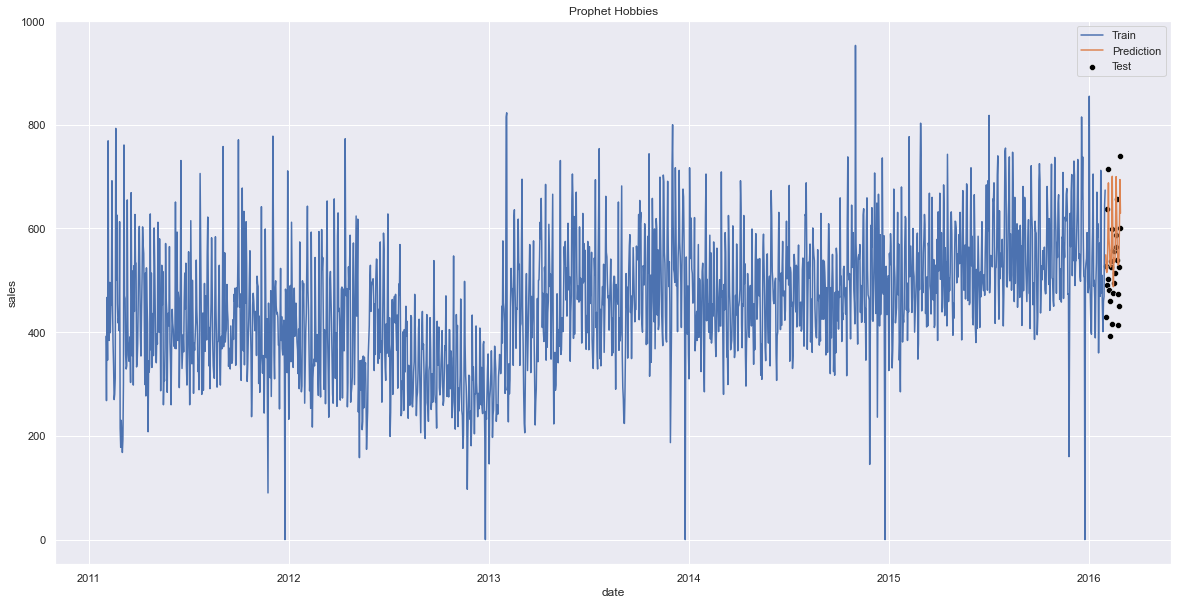

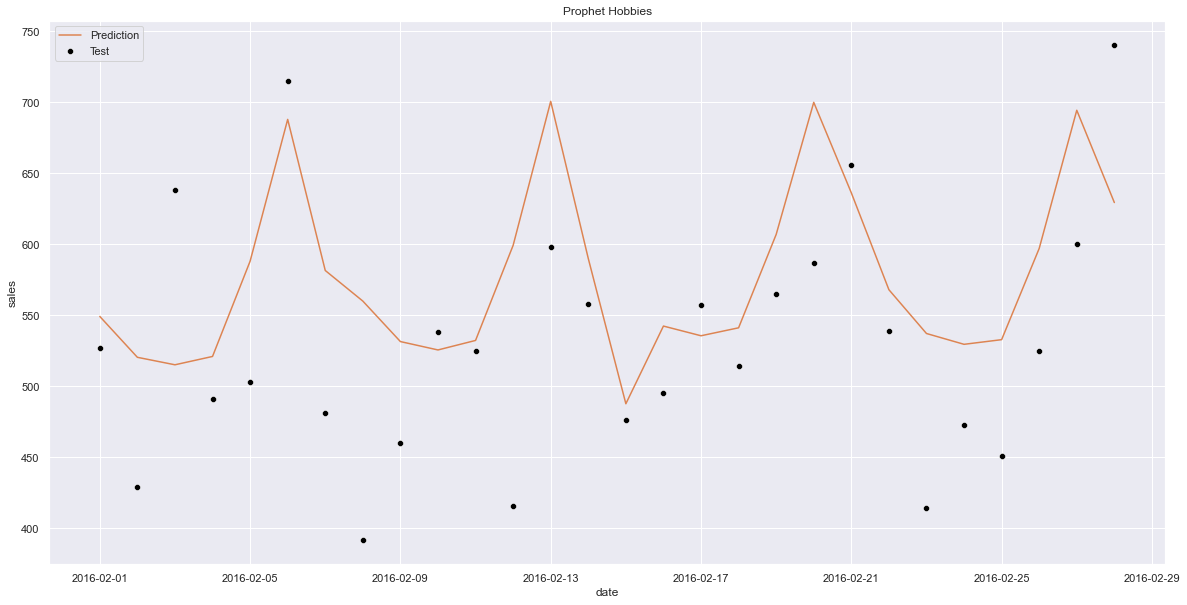

MAE:	 68.05


In [45]:
# Modellierung Hobbies

# Hobbies-Datensatz splitten
train_hobbies, test_hobbies = temporal_train_test_split(hobbies_grouped, test_size = 28)

# Prophet Data Frame kreiren
df_prophet_hobbies = pd.DataFrame(hobbies_grouped['sales'].astype('float'))
df_prophet_hobbies.reset_index(inplace = True)
df_prophet_hobbies.columns = ['ds', 'y']
display(df_prophet_hobbies)
#display(df_prophet_hobbies.info())

# Data Frame splitten
data_train_hobbies, data_test_hobbies = temporal_train_test_split(df_prophet_hobbies, test_size = 28)

# Erklärende Variablen initialisieren auf Basis der Feature Importance
data_train_hobbies['mean_price_dept1'] = train_hobbies['mean_price_dept1'].astype('float').to_numpy()
data_train_hobbies['mean_price_dept2'] = train_hobbies['mean_price_dept2'].astype('float').to_numpy() 
data_train_hobbies['Month_December'] = train_hobbies['Month_December'].astype('int').to_numpy()
data_train_hobbies['Month_April'] = train_hobbies['Month_April'].astype('int').to_numpy()
data_train_hobbies['Month_February'] = train_hobbies['Month_February'].astype('int').to_numpy()
data_train_hobbies['Month_January'] = train_hobbies['Month_January'].astype('int').to_numpy()
data_train_hobbies['Month_July'] = train_hobbies['Month_July'].astype('int').to_numpy()
data_train_hobbies['Month_June'] = train_hobbies['Month_June'].astype('int').to_numpy()
data_train_hobbies['Month_March'] = train_hobbies['Month_March'].astype('int').to_numpy()
data_train_hobbies['Month_November'] = train_hobbies['Month_November'].astype('int').to_numpy()
data_train_hobbies['Month_September'] = train_hobbies['Month_September'].astype('int').to_numpy()
data_train_hobbies['Weekday_Friday'] = train_hobbies['Weekday_Friday'].astype('int').to_numpy()
data_train_hobbies['Weekday_Monday'] = train_hobbies['Weekday_Monday'].astype('int').to_numpy()
data_train_hobbies['Weekday_Saturday'] = train_hobbies['Weekday_Saturday'].astype('int').to_numpy()
data_train_hobbies['Weekday_Sunday'] = train_hobbies['Weekday_Sunday'].astype('int').to_numpy()
#display(data_train_hobbies)
#data_train_hobbies.to_excel("hobbies_train.xlsx")

# Prophet Modellierung
p_hobbies = Prophet(yearly_seasonality = True, weekly_seasonality = True, holidays = holidays)
p_hobbies.add_regressor('mean_price_dept1')
p_hobbies.add_regressor('mean_price_dept2')
p_hobbies.add_regressor('Month_December')
p_hobbies.add_regressor('Month_April')
p_hobbies.add_regressor('Month_February')
p_hobbies.add_regressor('Month_January')
p_hobbies.add_regressor('Month_July')
p_hobbies.add_regressor('Month_June')
p_hobbies.add_regressor('Month_March')
p_hobbies.add_regressor('Month_November')
p_hobbies.add_regressor('Month_September')
p_hobbies.add_regressor('Weekday_Friday')
p_hobbies.add_regressor('Weekday_Monday')
p_hobbies.add_regressor('Weekday_Saturday')
p_hobbies.add_regressor('Weekday_Sunday')
p_hobbies.fit(data_train_hobbies)

future_hobbies = p_hobbies.make_future_dataframe(periods = len(test_hobbies), freq='D', include_history = False)
future_hobbies['mean_price_dept1'] = test_hobbies['mean_price_dept1'].to_numpy()
future_hobbies['mean_price_dept2'] = test_hobbies['mean_price_dept2'].to_numpy()
future_hobbies['Month_December'] = test_hobbies['Month_December'].to_numpy()
future_hobbies['Month_April'] = test_hobbies['Month_April'].to_numpy()
future_hobbies['Month_February'] = test_hobbies['Month_February'].to_numpy()
future_hobbies['Month_January'] = test_hobbies['Month_January'].to_numpy()
future_hobbies['Month_July'] = test_hobbies['Month_July'].to_numpy()
future_hobbies['Month_June'] = test_hobbies['Month_June'].to_numpy()
future_hobbies['Month_March'] = test_hobbies['Month_March'].to_numpy()
future_hobbies['Month_November'] = test_hobbies['Month_November'].to_numpy()
future_hobbies['Month_September'] = test_hobbies['Month_September'].to_numpy()
future_hobbies['Weekday_Friday'] = test_hobbies['Weekday_Friday'].to_numpy()
future_hobbies['Weekday_Monday'] = test_hobbies['Weekday_Monday'].to_numpy()
future_hobbies['Weekday_Saturday'] = test_hobbies['Weekday_Saturday'].to_numpy()
future_hobbies['Weekday_Sunday'] = test_hobbies['Weekday_Sunday'].to_numpy()
#display(future_hobbies)

forecast_hobbies = p_hobbies.predict(future_hobbies)
forecast_hobbies.set_index('ds', inplace = True)
#display(forecast_hobbies)

sns.lineplot(data = train_hobbies['sales'], label = 'Train')
sns.scatterplot(data = test_hobbies['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast_hobbies['yhat'], label = 'Prediction')
plt.title('Prophet Hobbies')
plt.show()

sns.scatterplot(data = test_hobbies['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast_hobbies['yhat'], color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Prophet Hobbies')
plt.show()

print('MAE:\t %4.2f' % (MAE(y_true = test_hobbies['sales'], y_pred = forecast_hobbies['yhat'])))

,ds,y
0,2011-02-01,401.0
1,2011-02-02,330.0
2,2011-02-03,402.0
3,2011-02-04,411.0
4,2011-02-05,706.0
...,...,...
1849,2016-02-24,820.0
1850,2016-02-25,769.0
1851,2016-02-26,849.0
1852,2016-02-27,1270.0


<ipython-input-46-dfc257f05401>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_household['mean_price_dept1'] = train_household['mean_price_dept1'].astype('float').to_numpy()
<ipython-input-46-dfc257f05401>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_household['mean_price_dept2'] = train_household['mean_price_dept2'].astype('float').to_numpy()
<ipython-input-46-dfc257f05401>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

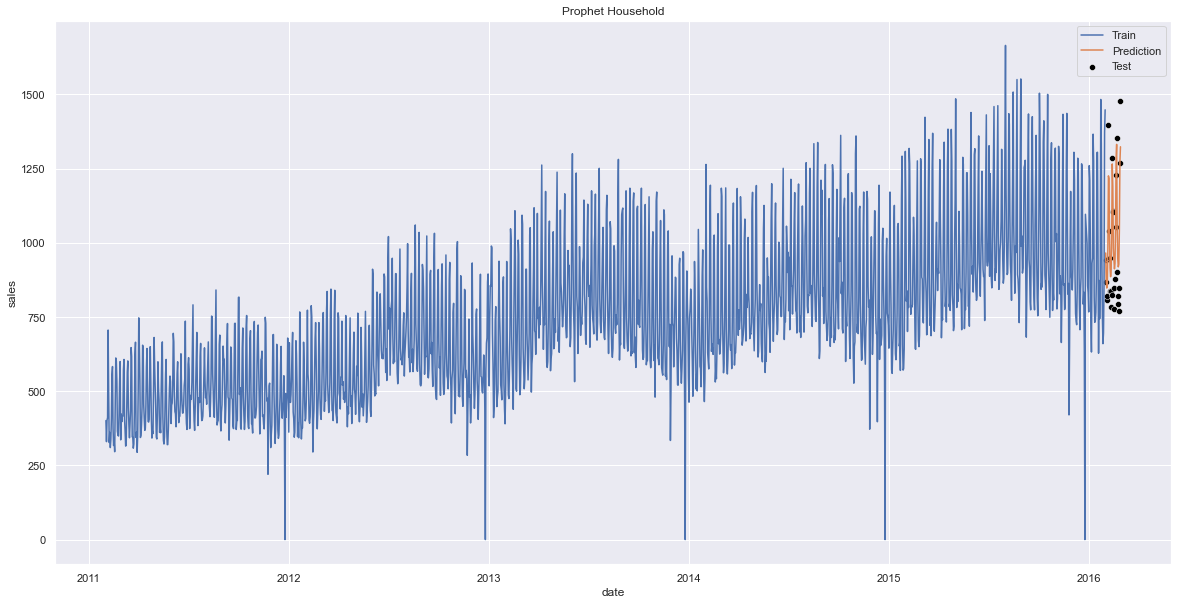

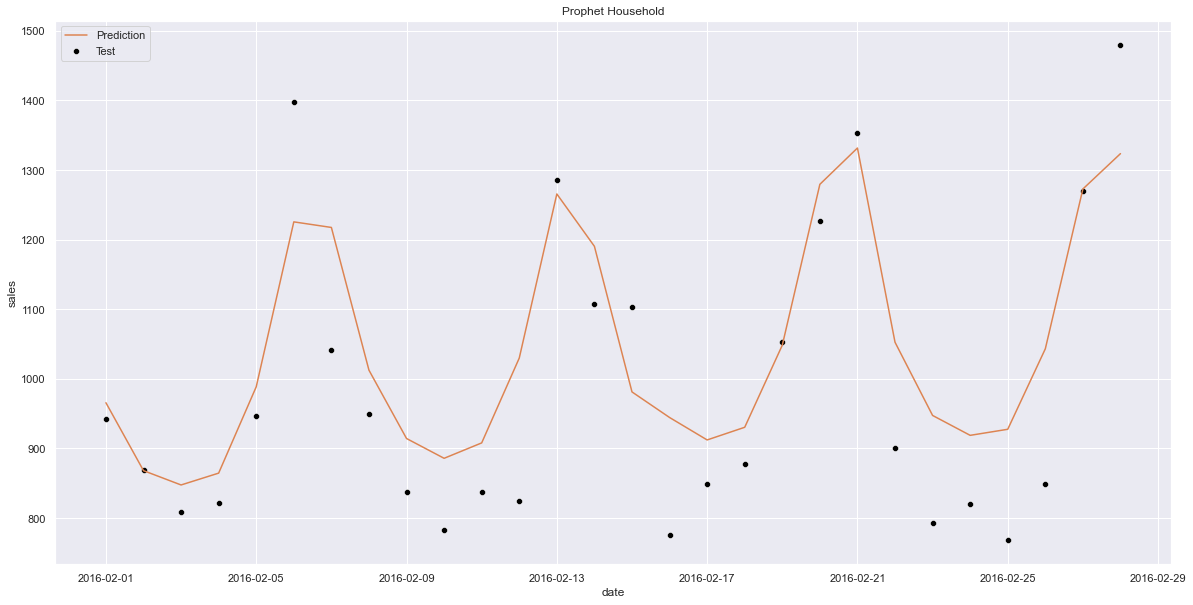

MAE:	 90.03


In [46]:
# Modellierung Household

# Household-Datensatz splitten
train_household, test_household = temporal_train_test_split(household_grouped, test_size = 28)

# Prophet Data Frame kreiren
df_prophet_household = pd.DataFrame(household_grouped['sales'].astype('float'))
df_prophet_household.reset_index(inplace = True)
df_prophet_household.columns = ['ds', 'y']
display(df_prophet_household)
#display(df_prophet_household.info())

# Data Frame splitten
data_train_household, data_test_household = temporal_train_test_split(df_prophet_household, test_size = 28)

# Erklärende Variablen initialisieren auf Basis der Feature Importance
data_train_household['mean_price_dept1'] = train_household['mean_price_dept1'].astype('float').to_numpy()
data_train_household['mean_price_dept2'] = train_household['mean_price_dept2'].astype('float').to_numpy()
data_train_household['Month_December'] = train_household['Month_December'].astype('int').to_numpy()
data_train_household['Month_April'] = train_household['Month_April'].astype('int').to_numpy()
data_train_household['Month_August'] = train_household['Month_August'].astype('int').to_numpy()
#data_train_household['Month_Feburary'] = train_household['Month_February'].astype('int').to_numpy() --> Bug ?
data_train_household['Month_January'] = train_household['Month_January'].astype('int').to_numpy()
data_train_household['Month_July'] = train_household['Month_July'].astype('int').to_numpy()
data_train_household['Month_June'] = train_household['Month_June'].astype('int').to_numpy()
data_train_household['Month_March'] = train_household['Month_March'].astype('int').to_numpy()
data_train_household['Month_November'] = train_household['Month_November'].astype('int').to_numpy()
data_train_household['Month_October'] = train_household['Month_October'].astype('int').to_numpy()
data_train_household['Month_September'] = train_household['Month_September'].astype('int').to_numpy()
#display(data_train_household)
#data_train_household.to_excel("household_train.xlsx")

# Prophet Modellierung
p_household = Prophet(yearly_seasonality = True, weekly_seasonality = True, holidays = holidays)
p_household.add_regressor('mean_price_dept1')
p_household.add_regressor('mean_price_dept2')
p_household.add_regressor('Month_December')
p_household.add_regressor('Month_April')
p_household.add_regressor('Month_August')
#p_household.add_regressor('Month_February') --> Bug ?
p_household.add_regressor('Month_January')
p_household.add_regressor('Month_July')
p_household.add_regressor('Month_June')
p_household.add_regressor('Month_March')
p_household.add_regressor('Month_November')
p_household.add_regressor('Month_October')
p_household.add_regressor('Month_September')
p_household.fit(data_train_household)

future_household = p_household.make_future_dataframe(periods = len(test_household), freq='D', include_history = False)
future_household['mean_price_dept1'] = test_household['mean_price_dept1'].to_numpy()
future_household['mean_price_dept2'] = test_household['mean_price_dept2'].to_numpy()
future_household['Month_December'] = test_household['Month_December'].to_numpy()
future_household['Month_April'] = test_household['Month_April'].to_numpy()
future_household['Month_August'] = test_household['Month_August'].to_numpy()
#future_household['Month_February'] = test_household['Month_February'].to_numpy() --> Bug ?
future_household['Month_January'] = test_household['Month_January'].to_numpy()
future_household['Month_July'] = test_household['Month_July'].to_numpy()
future_household['Month_June'] = test_household['Month_June'].to_numpy()
future_household['Month_March'] = test_household['Month_March'].to_numpy()
future_household['Month_November'] = test_household['Month_November'].to_numpy()
future_household['Month_October'] = test_household['Month_October'].to_numpy()
future_household['Month_September'] = test_household['Month_September'].to_numpy()
#display(future_household)

forecast_household = p_household.predict(future_household)
forecast_household.set_index('ds', inplace = True)
#display(forecast_household)

sns.lineplot(data = train_household['sales'], label = 'Train')
sns.scatterplot(data = test_household['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast_household['yhat'], label = 'Prediction')
plt.title('Prophet Household')
plt.show()

sns.scatterplot(data = test_household['sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast_household['yhat'], color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Prophet Household')
plt.show()

print('MAE:\t %4.2f' % (MAE(y_true = test_household['sales'], y_pred = forecast_household['yhat'])))

In [47]:
# Aggregation der Zeitreihen zu einer Sales-Zeitreihe & Visualisierung

# Trainingdaten
#display(train_food['sales'])
#display(train_hobbies['sales'])
#display(train_household['sales'])
prophet_train_agg = pd.merge(train_food['sales'], train_hobbies['sales'], on= "date")
prophet_train_agg = pd.merge(prophet_train_agg, train_household['sales'], on='date')
prophet_train_agg['Total'] = prophet_train_agg.sum(axis=1)
prophet_train_agg = prophet_train_agg.rename(columns={"sales_x": "Food", "sales_y": "Hobbies", "sales": "Household"})
#display(prophet_train_agg)

# Testdaten
#display(forecast_food['yhat'])
#display(forecast_hobbies['yhat'])
#display(forecast_household['yhat'])
prophet_test_agg = pd.merge(forecast_food['yhat'], forecast_hobbies['yhat'], on= "ds")
prophet_test_agg = pd.merge(prophet_test_agg, forecast_household['yhat'], on='ds')
prophet_test_agg['Total'] = prophet_test_agg.sum(axis=1)
prophet_test_agg = prophet_test_agg.rename(columns={"yhat_x": "Food", "yhat_y": "Hobbies", "yhat": "Household"})
#display(prophet_test_agg)

# Trainings- und Testdaten untereinander mergen
prophet_total_agg = prophet_train_agg.append(prophet_test_agg)
display(prophet_total_agg)

# To Do: Visualisierung

,Food,Hobbies,Household,Total
2011-02-01,2258.000000,392.000000,401.000000,3051.000000
2011-02-02,2032.000000,268.000000,330.000000,2630.000000
2011-02-03,2407.000000,467.000000,402.000000,3276.000000
2011-02-04,2693.000000,346.000000,411.000000,3450.000000
2011-02-05,3962.000000,769.000000,706.000000,5437.000000
...,...,...,...,...
2016-02-24,1981.598694,529.512200,918.772551,3429.883445
2016-02-25,2015.641422,532.786351,927.487320,3475.915092
2016-02-26,2478.757526,597.030794,1043.107402,4118.895722
2016-02-27,3163.918048,694.334668,1272.730393,5130.983108


In [ ]:
# To Do: Evaluation
# scores = cross_validation(p, initial='606 days', period='28 days', horizon = '28 days')
# metrics = performance_metrics(scores)
# display(metrics)
# print('MAE:\t %4.2f' % (metrics['mae'].mean()))

### 3.4 Evaluation

## 4. Absatzprognose